In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np

## Analýza krajů v2 - bez transferů

### 1. Download and load data

Ve filu 2014-2023_2 resim ruzne nazvy polozek, asi to cca není problém, beru zejména ty nejnovější

In [2]:
#### load 2024data from statnipokladna 
df1=pd.read_excel("data/2024_1.xlsx",header=6,sheet_name="MON1TOR EXPORT")
df2=pd.read_excel("data/2024_2.xlsx",header=6,sheet_name="MON1TOR EXPORT")
df3=pd.read_excel("data/2024_3.xlsx",header=6,sheet_name="MON1TOR EXPORT")
df24=pd.concat([df1, df2,df3], ignore_index=True)

# ### test: Can I infer Sesk and Podsesk kódy from Položka kód? - yes
# podsesk=[int(str(pol)[0:3]) for pol in df24.loc[:,"Položka (kód)"]]
# sesk=[int(str(pol)[0:2]) for pol in df24.loc[:,"Položka (kód)"]]
# test1=(df24.loc[:,"Podseskupení položek (kód)"]-podsesk).std()==0
# test2=(df24.loc[:,"Seskupení položek (kód) "]-sesk).std()==0
# if (test1==False) | (test2==False) : raise (ValueError) 
a=df24['2024 (k 29.02.)'].sum()

### make číselníky: 
## podsesk24
uniq=df24.loc[:,["Podseskupení položek (kód)","Podseskupení položek (název)"]].drop_duplicates()
podsesk24=dict(zip(uniq["Podseskupení položek (kód)"],uniq["Podseskupení položek (název)"]))
## sesk24
uniq=df24.loc[:,["Seskupení položek (kód) ","Seskupení položek (název)"]].drop_duplicates()
sesk24=dict(zip(uniq["Seskupení položek (kód) "],uniq["Seskupení položek (název)"]))
## pol24
uniq=df24.loc[:,["Položka (kód)","Položka (název)"]].drop_duplicates()
pol24=dict(zip(uniq["Položka (kód)"],uniq["Položka (název)"]))
## para24
uniq=df24.loc[:,["Paragraf (kód)","Paragraf (název)"]].drop_duplicates()
para24=dict(zip(uniq["Paragraf (kód)"],uniq["Paragraf (název)"]))
## small test - každý kód má právě jeden název
test3=len(df24.loc[:,["Podseskupení položek (kód)","Podseskupení položek (název)"]].drop_duplicates())-\
    len(df24.loc[:,["Podseskupení položek (kód)"]].drop_duplicates())==0
test4=len(df24.loc[:,["Seskupení položek (kód) ","Seskupení položek (název)"]].drop_duplicates())-\
    len(df24.loc[:,["Seskupení položek (kód) "]].drop_duplicates())==0
test5=len(df24.loc[:,["Položka (kód)","Položka (název)"]].drop_duplicates())-\
    len(df24.loc[:,["Položka (kód)"]].drop_duplicates())==0
test6=len(df24.loc[:,["Paragraf (kód)","Paragraf (název)"]].drop_duplicates())-\
    len(df24.loc[:,["Paragraf (kód)"]].drop_duplicates())==0
if (test3==False) | (test4==False) | (test5==False) | (test6==False) : raise (ValueError)
    
    
### rename & keep specific columns
df24cols={"Organizace (název)":"Kraj","Třída položek (název)":"Trida","Seskupení položek (kód) ":"Sesk","Podseskupení položek (kód)":"Podsesk",
        "Položka (kód)":"Pol","Paragraf (kód)":"Para",
         '2024 (k 29.02.)':"2024"} # chybi oproti SR "Zdroj (kód)":"Zdroj","Kapitola (název)":"Kapitola",
df24=df24.loc[:,df24cols.keys()].copy()
df24.columns=df24cols.values() 
b=df24["2024"].sum()
if a!=b: raise (ValueError) #sum of výdaje holds

C:\Users\32563404\Anaconda3\envs\base_updated\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\32563404\Anaconda3\envs\base_updated\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\32563404\Anaconda3\envs\base_updated\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
#### load 2014-2023data from statnipokladna 
df1=pd.read_excel("data/2014-2023_1.xlsx",header=6,sheet_name="MON1TOR EXPORT")
df2=pd.read_excel("data/2014-2023_2.xlsx",header=6,sheet_name="MON1TOR EXPORT")
df3=pd.read_excel("data/2014-2023_3.xlsx",header=6,sheet_name="MON1TOR EXPORT")
df14=pd.concat([df1, df2,df3], ignore_index=True)

# ### test: Can I infer Sesk and Podsesk kódy from Položka kód? - yes
# podsesk=[int(str(pol)[0:3]) for pol in df14.loc[:,"Položka (kód)"]]
# sesk=[int(str(pol)[0:2]) for pol in df14.loc[:,"Položka (kód)"]]
# test1=(df14.loc[:,"Podseskupení položek (kód)"]-podsesk).std()==0
# test2=(df14.loc[:,"Seskupení položek (kód) "]-sesk).std()==0
# if (test1==False) | (test2==False) : raise (ValueError) 
a=df14['2023'].sum()


### make číselníky: jen jako addition k číselníkům 2024, dropujeme duplicitní názvy a necháváme ten poslední (2023)
## podsesk24
uniq=df14.loc[:,["Podseskupení položek (kód)","Podseskupení položek (název)"]].drop_duplicates(subset="Podseskupení položek (kód)",keep="last")
podsesk14=dict(zip(uniq["Podseskupení položek (kód)"],uniq["Podseskupení položek (název)"]))
## sesk24
uniq=df14.loc[:,["Seskupení položek (kód) ","Seskupení položek (název)"]].drop_duplicates(subset="Seskupení položek (kód) ",keep="last")
sesk14=dict(zip(uniq["Seskupení položek (kód) "],uniq["Seskupení položek (název)"]))
## pol24
uniq=df14.loc[:,["Položka (kód)","Položka (název)"]].drop_duplicates(subset="Položka (kód)",keep="last")
pol14=dict(zip(uniq["Položka (kód)"],uniq["Položka (název)"]))
## para24
uniq=df14.loc[:,["Paragraf (kód)","Paragraf (název)"]].drop_duplicates(subset="Paragraf (kód)",keep="last")
para14=dict(zip(uniq["Paragraf (kód)"],uniq["Paragraf (název)"]))
    
    
### rename & keep specific columns
df14cols={"Organizace (název)":"Kraj","Třída položek (název)":"Trida","Seskupení položek (kód) ":"Sesk","Podseskupení položek (kód)":"Podsesk",
        "Položka (kód)":"Pol","Paragraf (kód)":"Para",
         } # chybi oproti SR "Zdroj (kód)":"Zdroj","Kapitola (název)":"Kapitola",
years_list=['2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2023']
df14=df14.loc[:,list(df14cols.keys())+years_list].copy()
df14.columns=list(df14cols.values())+years_list 
    
### merge together duplicate Pol & Para (I checked that sums hold)
df14=df14.groupby(["Kraj","Trida","Sesk","Podsesk","Pol","Para"]).sum().reset_index()
b=df14["2023"].sum()
if int(a)!=int(b): raise (ValueError) #sum of výdaje holds

C:\Users\32563404\Anaconda3\envs\base_updated\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\32563404\Anaconda3\envs\base_updated\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
### merge the two data 
df=df14.merge(df24,how="outer",validate="one_to_one").copy()

### replace NANs with 0
years=years_list+["2024"]
for year in years:
    df.loc[:,year]=df.loc[:,year].fillna(0)
    
### small check
c=df["2023"].sum()
if int(a)!=int(c): raise (ValueError) #sum of výdaje holds



In [5]:
### change in V2: Oddělat transfery na výdajové straně
df_vse=df.copy()
df1t=pd.read_excel("data/2023_VKT_1.xlsx",header=4,sheet_name="MON1TOR EXPORT")
df2t=pd.read_excel("data/2023_VKT_2.xlsx",header=4,sheet_name="MON1TOR EXPORT")
df23=pd.concat([df1t, df2t], ignore_index=True)
df23
a=df23['Výsledek výdajů od počátku roku'].sum()
##rename & keep cols
df23cols={"Organizace (název)":"Kraj","Třída položek výdaje  (název)":"Trida","Seskupení položek (kód) ":"Sesk","Podseskupení položek (kód)":"Podsesk",
        "Položka výdaje (kód)":"Pol","Paragraf výdaje (kód)":"Para",
         'Výsledek výdajů od počátku roku':"2023 VKT"} # chybi oproti SR "Zdroj (kód)":"Zdroj","Kapitola (název)":"Kapitola",
df23=df23.loc[:,df23cols.keys()].copy()
df23.columns=df23cols.values() 
b=df23["2023 VKT"].sum()
if a!=b: raise (ValueError) #sum of výdaje holds
##merge with main dataset
df23=df23.groupby(['Kraj', 'Trida', 'Sesk', 'Podsesk', 'Pol', 'Para']).sum().reset_index()
df_old=df.copy()
df=df.merge(df23,on=['Kraj', 'Trida', 'Sesk', 'Podsesk', 'Pol', 'Para'],how="left",validate="one_to_one")
df.loc[:,'2023 VKT'] = df.loc[:,'2023 VKT'].fillna(0)
df.loc[:,'2023']=df.loc[:,'2023']-df.loc[:,'2023 VKT']

C:\Users\32563404\Anaconda3\envs\base_updated\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [6]:
### check: Podíl VKT na přijatých transferech
df_check=pd.DataFrame({})
for kraj in df.Kraj.unique():
    cond=(df.Sesk==41)|(df.Sesk==42)
    pkt=df.loc[(df.Kraj==kraj)&(cond),"2023"].sum()
    vkt=df23.loc[df23.Kraj==kraj,"2023 VKT"].sum()
    df_check.loc["ShareVKT",kraj]=vkt/pkt
df_check

,Hlavní město Praha,Jihomoravský kraj,Jihočeský kraj,Karlovarský kraj,Kraj Vysočina,Královéhradecký kraj,Liberecký kraj,Moravskoslezský kraj,Olomoucký kraj,Pardubický kraj,Plzeňský kraj,Středočeský kraj,Zlínský kraj,Ústecký kraj
ShareVKT,0.888126,0.981227,0.989362,1.055354,0.977342,0.965937,0.975963,0.976574,0.954775,0.979158,0.962663,0.991462,0.976515,0.964112


In [7]:
### Oddělat transfery na příjmové straně
df_all=df.copy()
cond=(df.Sesk!=41)&(df.Sesk!=42)
df=df.loc[cond,:]

In [8]:
### filter out příjmy a výdaje
cond_vydaje=[t.endswith("výdaje") for t in df.Trida]
cond_prijmy=[not t.endswith("výdaje") for t in df.Trida]
df_v=df.loc[cond_vydaje,:]
df_p=df.loc[cond_prijmy,:]

In [9]:
### merge ciselniky (základ je rok 2024, kdyžtak to můžu i obrátit)
## seskupení
a=pd.DataFrame([sesk14],index=[2014]).T
b=pd.DataFrame([sesk24],index=[2024]).T
ab=a.merge(b,left_index=True,right_index=True,how="outer")
#nový číselník
cond=ab.loc[:,2024].isna()
ab.loc[cond,2024]=ab.loc[cond,2014].copy()
sesk_cis=dict(ab.loc[:,2024])

## podseskupení
a=pd.DataFrame([podsesk14],index=[2014]).T
b=pd.DataFrame([podsesk24],index=[2024]).T
ab=a.merge(b,left_index=True,right_index=True,how="outer")
#nový číselník
cond=ab.loc[:,2024].isna()
ab.loc[cond,2024]=ab.loc[cond,2014].copy()
podsesk_cis=dict(ab.loc[:,2024])

## položky
a=pd.DataFrame([pol14],index=[2014]).T
b=pd.DataFrame([pol24],index=[2024]).T
ab=a.merge(b,left_index=True,right_index=True,how="outer")
#nový číselník
cond=ab.loc[:,2024].isna()
ab.loc[cond,2024]=ab.loc[cond,2014].copy()
pol_cis=dict(ab.loc[:,2024])

## paragrafy
a=pd.DataFrame([para14],index=[2014]).T
b=pd.DataFrame([para24],index=[2024]).T
ab=a.merge(b,left_index=True,right_index=True,how="outer")
#nový číselník
cond=ab.loc[:,2024].isna()
ab.loc[cond,2024]=ab.loc[cond,2014].copy()
para_cis=dict(ab.loc[:,2024])

### 1.1. Load data from ČSÚ

In [10]:
kraje=df.Kraj.unique()
kraje=np.array(['Hlavní město Praha', 'Středočeský kraj', 'Jihočeský kraj', #z RUD filu, podle NUTS3
       'Plzeňský kraj', 'Karlovarský kraj', 'Ústecký kraj',
       'Liberecký kraj', 'Královéhradecký kraj', 'Pardubický kraj',
       'Kraj Vysočina', 'Jihomoravský kraj', 'Olomoucký kraj',
       'Zlínský kraj', 'Moravskoslezský kraj'])
cond=[kraj not in ["Hlavní město Praha"] for kraj in kraje] #Removing Praha
kraje=kraje[cond]
yearsint=[int(year) for year in years]
obyv=pd.DataFrame({})
hdp=pd.DataFrame({})
for kraj in kraje:
    if kraj[0:3]=="Jih":
        a=kraj[0:5]
    else:
        a=kraj[0:3]
    if a=="Mor":
        df_aux=pd.read_excel(f"data/{a}.xlsx",header=1,index_col=0)
    else:
        df_aux=pd.read_excel(f"data/{a}.xlsx",header=2,index_col=0)
    #rename
    cond1=[i.startswith("Střední stav obyvatel") for i in df_aux.index.astype("str")]
    cond2=[i.startswith("Hrubý domácí produkt") for i in df_aux.index.astype("str")]
    df_aux=df_aux.rename(index={df_aux.index[cond1][0]:"Počet obyvatel",df_aux.index[cond2][0]:"HDP"},columns=dict(zip(yearsint,years)))
    #check
    if np.array(cond1).sum()!=1 or np.array(cond2).sum()!=1: raise (ValueError)
    obyv.loc[kraj,years[:-2]]=df_aux.loc["Počet obyvatel",years[:-2]]
    hdp.loc[kraj,years[:-2]]=df_aux.loc["HDP",years[:-2]]
#nový ordering krajů
year="2023"
cond_rud=(df_p.Pol==1111)|(df_p.Pol==1112)|(df_p.Pol==1113)|(df_p.Pol==1121)|(df_p.Pol==1211)
df1=df_p.loc[cond_rud,["Kraj",year]].groupby("Kraj").sum().reindex(kraje)
df1=df1.loc[kraje,year]/obyv.loc[kraje,str(int(year)-1)].astype(float)
kraje=list(pd.DataFrame(df1).sort_values(by=0,ascending=False).index)

### 2.1. Celkové příjmy a výdaje 2022, plus jako podíl na počet obyvatel a na HDP

In [1]:
figsize=(15,8)
fontsize=14
year="2023"
df1=df_v.loc[:,["Kraj",year]].groupby("Kraj").sum().reindex(kraje)
df2=df_p.loc[:,["Kraj",year]].groupby("Kraj").sum().reindex(kraje)
#prijmy RUD
cond_rud=(df_p.Pol==1111)|(df_p.Pol==1112)|(df_p.Pol==1113)|(df_p.Pol==1121)|(df_p.Pol==1211)
df3=df_p.loc[cond_rud,["Kraj",year]].groupby("Kraj").sum().reindex(kraje)

#graph
plt.rcParams.update({'font.size': fontsize})
fig, ax = plt.subplots(figsize=figsize)

# Set position of bar on X axis
barWidth = 0.2

br=np.arange(len(kraje))
for i in range(2):
    if i==1:
        br=[x + barWidth for x in br]
        ax.bar(br,df1.loc[kraje,year]/10**9,width = barWidth,label=f"Výdaje")
    else:
        ax.bar(br,df3.loc[kraje,year]/10**9,width = barWidth,label=f"Příjmy - RUD")
        ax.bar(br,(df2.loc[kraje,year]-df3.loc[kraje,year])/10**9,bottom=df3.loc[kraje,year]/10**9, width = barWidth,label=f"Příjmy - ostatní",color="lightblue")

hline1=np.average(df1.reindex(kraje)/10**9) #,weights=obyv.loc[:,["2022"]].reindex(kraje)
hline2=np.average(df2.reindex(kraje)/10**9) #,weights=obyv.loc[:,["2022"]].reindex(kraje)
ax.axhline(y=hline1, color="tab:orange", linestyle='--')
ax.text(x=ax.get_xlim()[1]-3.5,y=hline1-0.5,s="průměr výdajů",color="tab:orange",fontsize="small",fontfamily="cursive")
ax.axhline(y=hline2, color="tab:blue", linestyle='--')
ax.text(x=ax.get_xlim()[1]-3.5,y=hline2+0.2,s="průměr příjmů",color="tab:blue",fontsize="small",fontfamily="cursive")

#fmt = '%.0f %%'
#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter(fmt))
ax.set_ylabel("Mld. Kč")
ax.set_xticks([r + barWidth for r in range(len(kraje))],
        kraje,rotation=45,ha="right",rotation_mode="anchor")
ax.legend()
plt.savefig("graphs/graf_1.jpg",dpi=300,bbox_inches="tight")
df_exl=(df1/10**9).rename(columns={year:f"Výdaje"}).join(((df2-df3)/10**9).rename(columns={year:f"Příjmy - ostatní"})).join((df3/10**9).rename(columns={year:f"Příjmy - RUD"}))
df_exl.to_excel("graphs/graf_1.xlsx")
plt.show()

NameError: name 'df_v' is not defined

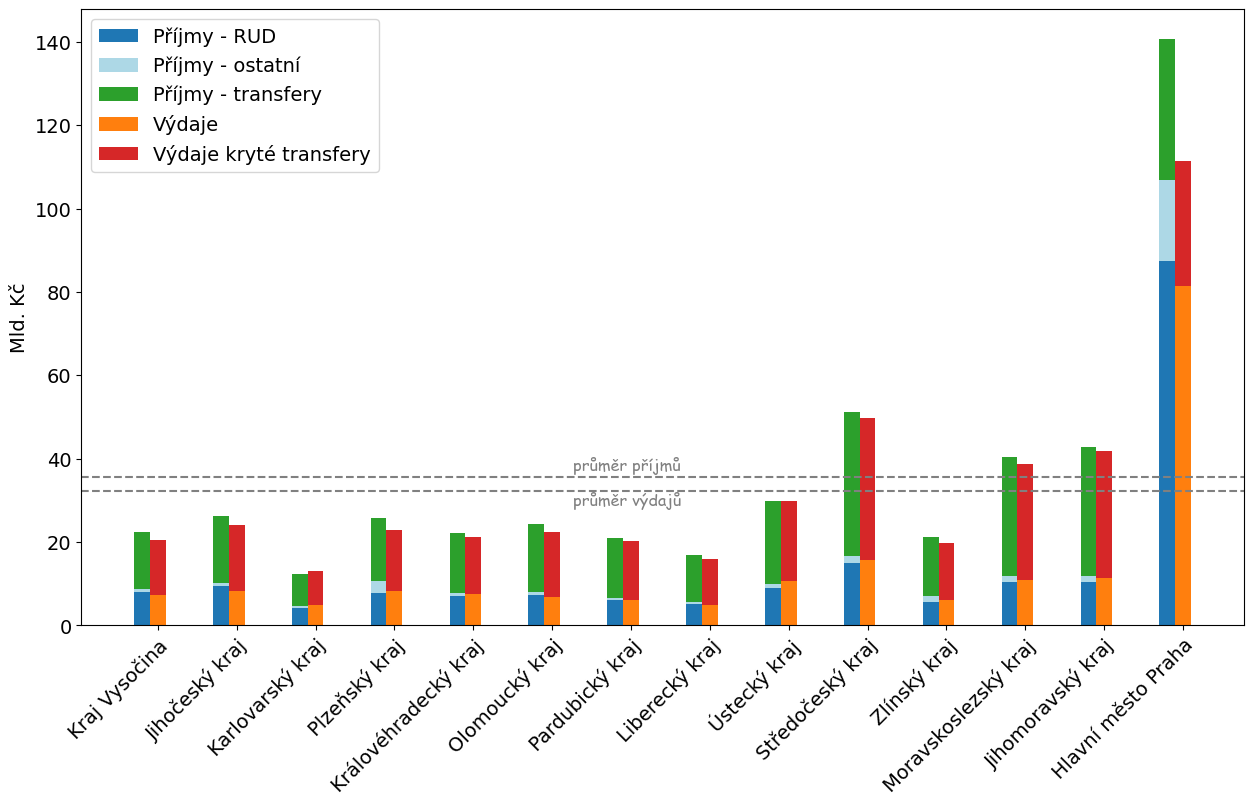

In [12]:
##do Appendixu i s transfery (a Prahou?)
kraje.append("Hlavní město Praha")
figsize=(15,8)
fontsize=14
year="2023"
df1=df_v.loc[:,["Kraj",year]].groupby("Kraj").sum().reindex(kraje)
df2=df_p.loc[:,["Kraj",year]].groupby("Kraj").sum().reindex(kraje)
#prijmy RUD
cond_rud=(df_p.Pol==1111)|(df_p.Pol==1112)|(df_p.Pol==1113)|(df_p.Pol==1121)|(df_p.Pol==1211)
df3=df_p.loc[cond_rud,["Kraj",year]].groupby("Kraj").sum().reindex(kraje)
#VKT
df4=df_v.loc[:,["Kraj",f"{year} VKT"]].groupby("Kraj").sum().reindex(kraje)
df4=df4.rename(columns={f"{year} VKT":year})
#transferove prijmy
cond_tr=(df_all.Sesk==41)|(df_all.Sesk==42)
df5=df_all.loc[cond_tr,["Kraj",year]].groupby("Kraj").sum().reindex(kraje)

#graph
plt.rcParams.update({'font.size': fontsize})
fig, ax = plt.subplots(figsize=figsize)

# Set position of bar on X axis
barWidth = 0.2

br=np.arange(len(kraje))
for i in range(2):
    if i==1:
        br=[x + barWidth for x in br]
        ax.bar(br,df1.loc[kraje,year]/10**9,width = barWidth,label=f"Výdaje")
        ax.bar(br,df4.loc[kraje,year]/10**9,bottom=df1.loc[kraje,year]/10**9,width = barWidth,label=f"Výdaje kryté transfery",color="tab:red")
    else:
        ax.bar(br,df3.loc[kraje,year]/10**9,width = barWidth,label=f"Příjmy - RUD")
        ax.bar(br,(df2.loc[kraje,year]-df3.loc[kraje,year])/10**9,bottom=df3.loc[kraje,year]/10**9, width = barWidth,label=f"Příjmy - ostatní",color="lightblue")
        ax.bar(br,df5.loc[kraje,year]/10**9,bottom=df2.loc[kraje,year]/10**9, width = barWidth,label=f"Příjmy - transfery",color="tab:green")
hline1=np.average((df1.reindex(kraje)+df4.reindex(kraje))/10**9) #,weights=obyv.loc[:,["2022"]].reindex(kraje)
hline2=np.average((df2.reindex(kraje)+df5.reindex(kraje))/10**9) #,weights=obyv.loc[:,["2022"]].reindex(kraje)
ax.axhline(y=hline1, color="grey", linestyle='--')
ax.text(x=ax.get_xlim()[1]-8.5,y=hline1-3.5,s="průměr výdajů",color="grey",fontsize="small",fontfamily="cursive")
ax.axhline(y=hline2, color="grey", linestyle='--')
ax.text(x=ax.get_xlim()[1]-8.5,y=hline2+1.6,s="průměr příjmů",color="grey",fontsize="small",fontfamily="cursive")

#fmt = '%.0f %%'
#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter(fmt))
ax.set_ylabel("Mld. Kč")
ax.set_xticks([r + barWidth for r in range(len(kraje))],
        kraje,rotation=45,ha="right",rotation_mode="anchor")
ax.legend()
plt.savefig("graphs/graf_A1.jpg",dpi=300,bbox_inches="tight")
df_exl=(df1/10**9).rename(columns={year:f"Výdaje"}).join(((df2-df3)/10**9).rename(columns={year:f"Příjmy - ostatní"})).join((df3/10**9).rename(columns={year:f"Příjmy - RUD"}))\
                                    .join((df4/10**9).rename(columns={year:f"Výdaje kryté transfery"})).join((df5/10**9).rename(columns={year:f"Příjmy - transfery"}))
df_exl.to_excel("graphs/graf_A1.xlsx")
kraje.remove("Hlavní město Praha")
plt.show()

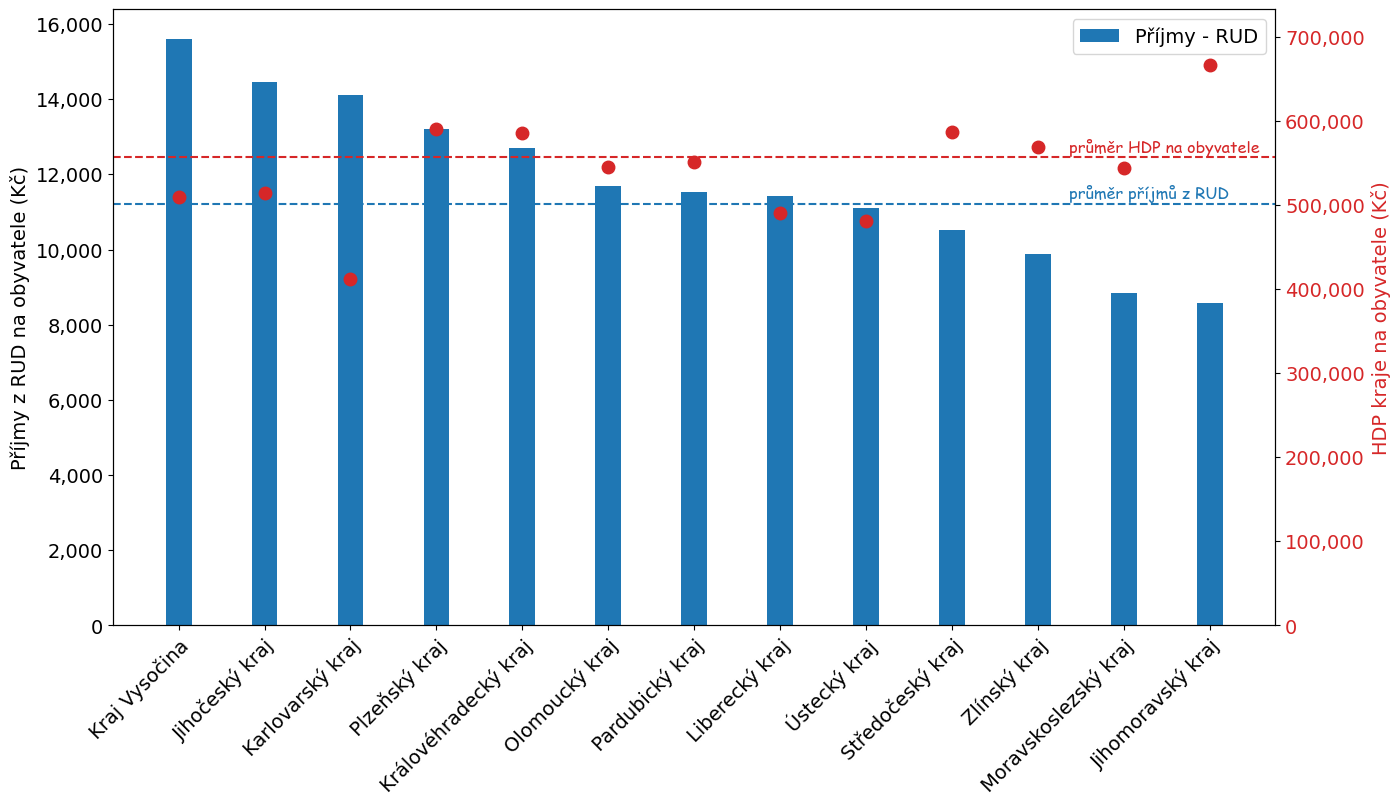

In [13]:
### RUD na obyv vs HDP na obyv
year="2023"
df1=df_v.loc[:,["Kraj",year]].groupby("Kraj").sum().reindex(kraje)
df2=df_p.loc[:,["Kraj",year]].groupby("Kraj").sum().reindex(kraje)
cond_rud=(df_p.Pol==1111)|(df_p.Pol==1112)|(df_p.Pol==1113)|(df_p.Pol==1121)|(df_p.Pol==1211)
df3=df_p.loc[cond_rud,["Kraj",year]].groupby("Kraj").sum().reindex(kraje)

#graph
fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})

# Set position of bar on X axis
barWidth = 0.2

br=np.arange(len(kraje))
for i in range(2):
    if i==1:
        br=[x + barWidth for x in br]
        df3.loc[kraje,year]=df3.loc[kraje,year]/obyv.loc[kraje,str(int(year)-1)].astype(float)
        ax.bar(br,df3.loc[kraje,year],width = barWidth*1.5,label=f"Příjmy - RUD")
    else:
        True
        #df2.loc[kraje,year]=df2.loc[kraje,year]/obyv.loc[kraje,str(int(year)-1)].astype(float)
        #ax.bar(br,df2.loc[kraje,year],width = barWidth,label=f"Příjmy {year}")

y2=(hdp.loc[:,"2022"])*(7341/6786)*(10**6)/obyv.loc[:,"2022"]
y2=y2.reindex(kraje)
ax2=ax.twinx()
ax2col="tab:red"
ax2.set_ylabel('HDP kraje na obyvatele (Kč)', color = ax2col) 
ax2.plot(np.arange(len(kraje))+0.2, y2, color = ax2col,marker='o', linestyle='none',markersize=9)
ax2.tick_params(axis ='y', labelcolor = ax2col)
ax2.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.grid(False)

hline1=np.average(df3.reindex(kraje),weights=obyv.loc[:,["2022"]].reindex(kraje))
ax.axhline(y=hline1, color="tab:blue", linestyle='--')
ax.text(x=ax.get_xlim()[1]-2.4,y=hline1+150,s="průměr příjmů z RUD",color="tab:blue",fontsize="small",fontfamily="cursive")
hline2=np.average(pd.DataFrame(y2).reindex(kraje),weights=obyv.loc[:,["2022"]].reindex(kraje))
ax2.axhline(y=hline2, color="tab:red", linestyle='--')
ax2.text(x=ax.get_xlim()[1]-2.4,y=hline2+4500,s="průměr HDP na obyvatele",color="tab:red",fontsize="small",fontfamily="cursive")
ax2.set_ylim(top=y2.max()*1.1,bottom=0)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel("Příjmy z RUD na obyvatele (Kč)")
ax.set_xticks([r + barWidth for r in range(len(kraje))],
        kraje,rotation=45,ha="right",rotation_mode="anchor")
ax.legend()
plt.savefig("graphs/graf_2a_old.jpg",dpi=300,bbox_inches="tight")
df_exl=df3.rename(columns={year:f"Příjmy z RUD na obyvatele (Kč)"}).join(pd.DataFrame(y2).rename(columns={"2022":"HDP kraje na obyvatele (Kč)"}))
df_exl.to_excel("graphs/graf_2a_old.xlsx")
df_2a=df_exl.copy()
plt.show()

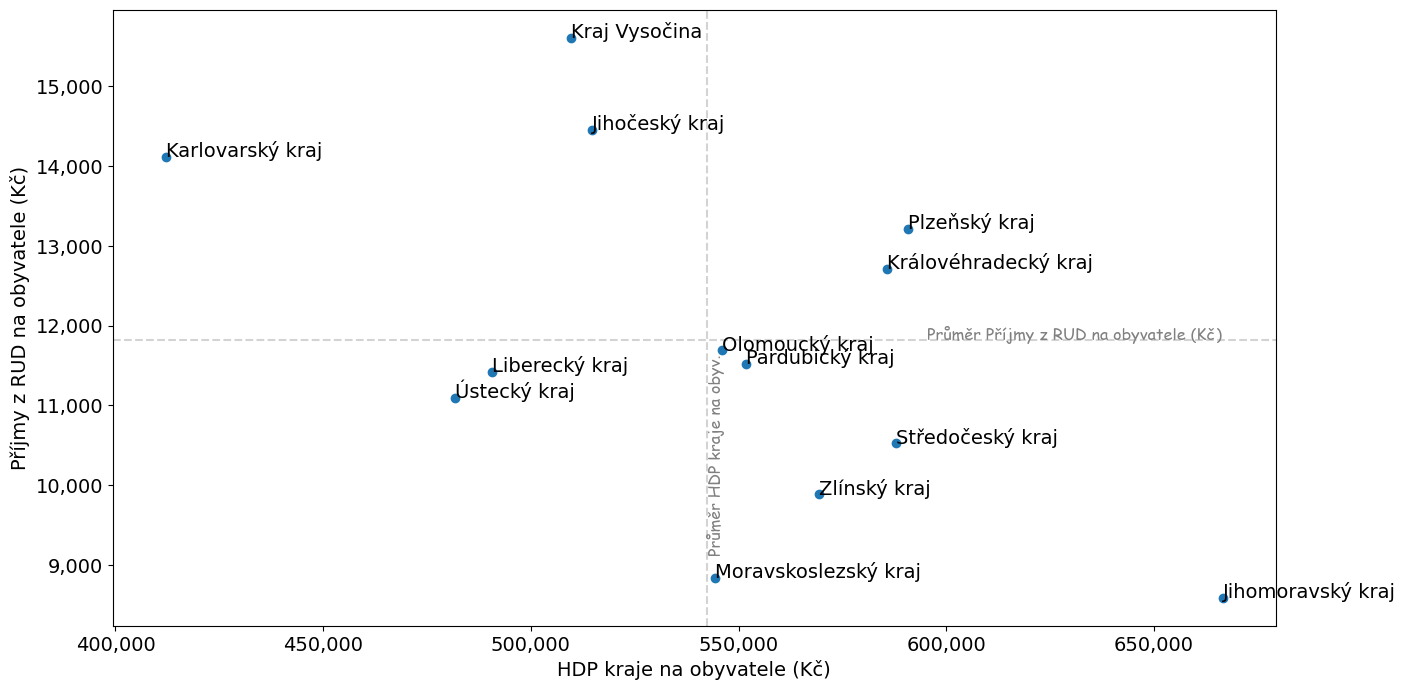

In [14]:
### RUD na obyv vs HDP na obyv - scatter
y=df_2a.loc[:,"Příjmy z RUD na obyvatele (Kč)"]
x=df_2a.loc[:,"HDP kraje na obyvatele (Kč)"]
n=df_2a.index

fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
ax.scatter(x, y)

for i, txt in enumerate(n):
    if txt[0:3]=="Jih":
        ax.annotate(txt, (x.iloc[i], y.iloc[i]))
    else:
        ax.annotate(txt, (x.iloc[i], y.iloc[i]))
        
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel(x.name)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel(y.name)
ax.axhline(y=y.mean(), color="lightgrey", linestyle='--')
ax.text(x=(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.7),y=y.mean(),s=f"Průměr {y.name}",color="grey",fontsize="small",fontfamily="cursive")
ax.axvline(x=x.mean(), color="lightgrey", linestyle='--')
ax.text(x=x.mean(),y=(ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.12),s=f"Průměr {x.name[0:17]}.",color="grey",fontsize="small",rotation="vertical",fontfamily="cursive")
plt.savefig("graphs/graf_2a.jpg",dpi=300,bbox_inches="tight")
df_exl=pd.DataFrame(y).join(pd.DataFrame(x))
df_exl.to_excel("graphs/graf_2a.xlsx")
plt.show()

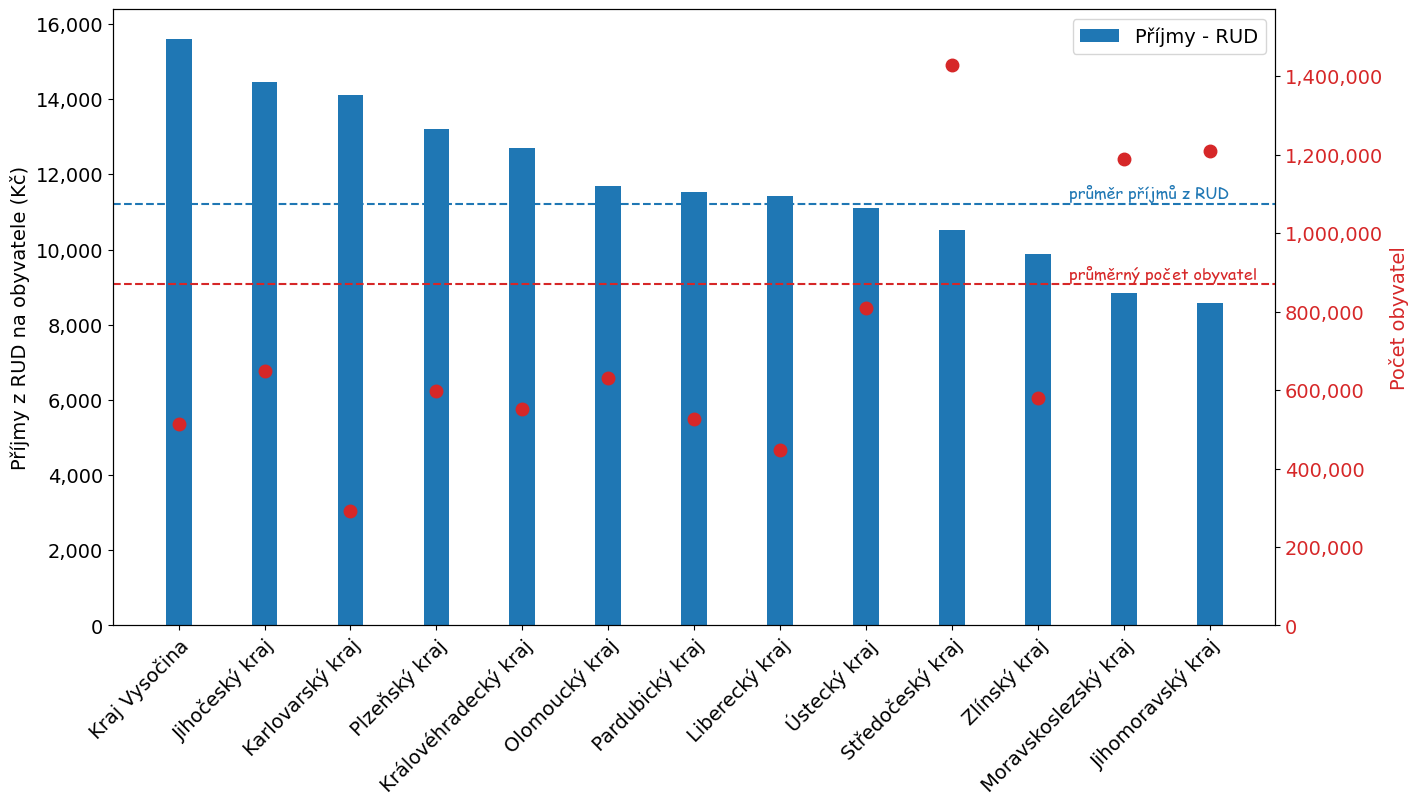

In [15]:
### RUD na obyv vs počet obyv
year="2023"
df1=df_v.loc[:,["Kraj",year]].groupby("Kraj").sum().reindex(kraje)
df2=df_p.loc[:,["Kraj",year]].groupby("Kraj").sum().reindex(kraje)
cond_rud=(df_p.Pol==1111)|(df_p.Pol==1112)|(df_p.Pol==1113)|(df_p.Pol==1121)|(df_p.Pol==1211)
df3=df_p.loc[cond_rud,["Kraj",year]].groupby("Kraj").sum().reindex(kraje)

#graph
fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})

# Set position of bar on X axis
barWidth = 0.2

br=np.arange(len(kraje))
for i in range(2):
    if i==1:
        br=[x + barWidth for x in br]
        df3.loc[kraje,year]=df3.loc[kraje,year]/obyv.loc[kraje,str(int(year)-1)].astype(float)
        ax.bar(br,df3.loc[kraje,year],width = barWidth*1.5,label=f"Příjmy - RUD")
    else:
        True
        #df2.loc[kraje,year]=df2.loc[kraje,year]/obyv.loc[kraje,str(int(year)-1)].astype(float)
        #ax.bar(br,df2.loc[kraje,year],width = barWidth,label=f"Příjmy {year}")

y2=obyv.loc[:,"2022"]
y2=y2.reindex(kraje)
ax2=ax.twinx()
ax2col="tab:red"
ax2.set_ylabel('Počet obyvatel', color = ax2col) 
ax2.plot(np.arange(len(kraje))+0.2, y2, color = ax2col,marker='o', linestyle='none',markersize=9)
ax2.tick_params(axis ='y', labelcolor = ax2col)
ax2.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.grid(False)

hline1=np.average(df3.reindex(kraje),weights=obyv.loc[:,["2022"]].reindex(kraje))
ax.axhline(y=hline1, color="tab:blue", linestyle='--')
ax.text(x=ax.get_xlim()[1]-2.4,y=hline1+150,s="průměr příjmů z RUD",color="tab:blue",fontsize="small",fontfamily="cursive")
hline2=np.average(pd.DataFrame(y2).reindex(kraje),weights=obyv.loc[:,["2022"]].reindex(kraje))
ax2.axhline(y=hline2, color="tab:red", linestyle='--')
ax2.text(x=ax.get_xlim()[1]-2.4,y=hline2+11500,s="průměrný počet obyvatel",color="tab:red",fontsize="small",fontfamily="cursive")
ax2.set_ylim(top=y2.max()*1.1,bottom=0)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel("Příjmy z RUD na obyvatele (Kč)")
ax.set_xticks([r + barWidth for r in range(len(kraje))],
        kraje,rotation=45,ha="right",rotation_mode="anchor")
ax.legend()
plt.savefig("graphs/graf_2b_old.jpg",dpi=300,bbox_inches="tight")
df_exl=df3.rename(columns={year:f"Příjmy z RUD na obyvatele (Kč)"}).join(pd.DataFrame(y2).rename(columns={"2022":"Počet obyvatel"}))
df_exl.to_excel("graphs/graf_2b_old.xlsx")
df_2b=df_exl.copy()
plt.show()

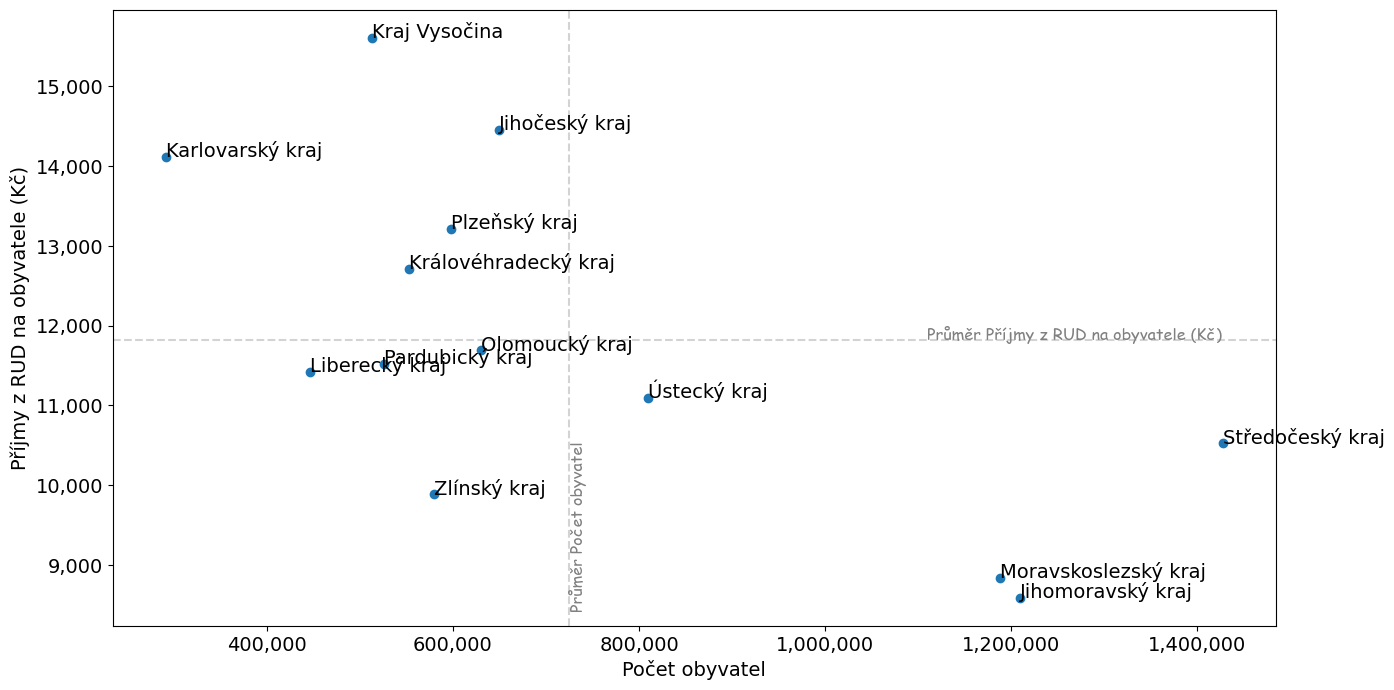

In [16]:
### RUD na obyv vs počet obyv - scatter
y=df_2b.loc[:,"Příjmy z RUD na obyvatele (Kč)"]
x=df_2b.loc[:,"Počet obyvatel"]
n=df_2b.index

fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
ax.scatter(x, y)

for i, txt in enumerate(n):
    if txt[0:3]=="Jih":
        ax.annotate(txt, (x.iloc[i], y.iloc[i]))
    else:
        ax.annotate(txt, (x.iloc[i], y.iloc[i]))
        
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel(x.name)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel(y.name)
ax.axhline(y=y.mean(), color="lightgrey", linestyle='--')
ax.text(x=(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.7),y=y.mean(),s=f"Průměr {y.name}",color="grey",fontsize="small",fontfamily="cursive")
ax.axvline(x=x.mean(), color="lightgrey", linestyle='--')
ax.text(x=x.mean(),y=(ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.03),s=f"Průměr {x.name}",color="grey",fontsize="small",rotation="vertical",fontfamily="cursive")
plt.savefig("graphs/graf_2b.jpg",dpi=300,bbox_inches="tight")
df_exl=pd.DataFrame(y).join(pd.DataFrame(x))
df_exl.to_excel("graphs/graf_2b.xlsx")
plt.show()

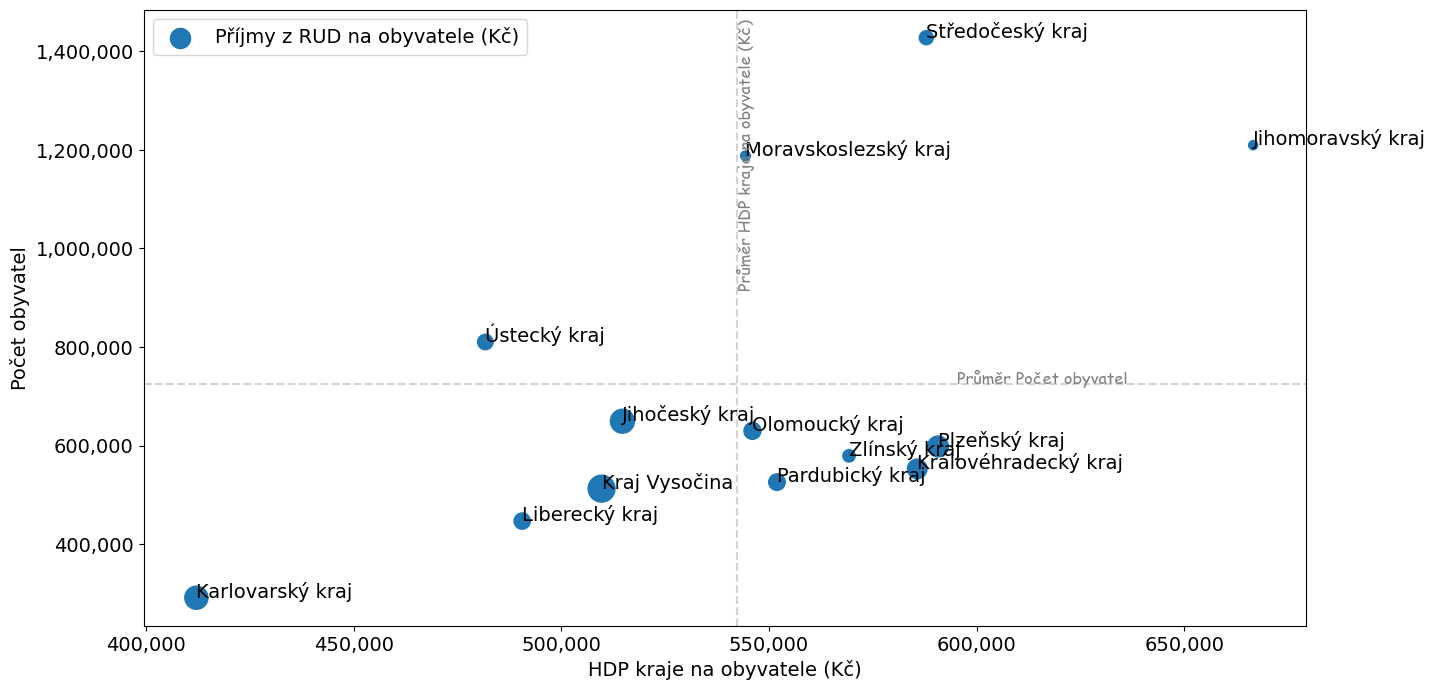

In [17]:
### počet obyv a HDP na obyv, a tloušťka pointu bude RUD na obyv - scatter
x=df_2a.loc[:,"HDP kraje na obyvatele (Kč)"]
y=df_2b.loc[:,"Počet obyvatel"]
s=df_2a.loc[:,"Příjmy z RUD na obyvatele (Kč)"]
n=df_2b.index

fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
ax.scatter(x, y,s=((s/100-50)**2)/30,label="Příjmy z RUD na obyvatele (Kč)")
for i, txt in enumerate(n):
    if txt[0:3]=="Jih":
        ax.annotate(txt, (x.iloc[i], y.iloc[i]))
    else:
        ax.annotate(txt, (x.iloc[i], y.iloc[i]))
        
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel(x.name)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel(y.name)
ax.axhline(y=y.mean(), color="lightgrey", linestyle='--')
ax.text(x=(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.7),y=y.mean(),s=f"Průměr {y.name}",color="grey",fontsize="small",fontfamily="cursive")
ax.axvline(x=x.mean(), color="lightgrey", linestyle='--')
ax.text(x=x.mean(),y=(ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.55),s=f"Průměr {x.name}",color="grey",fontsize="small",rotation="vertical",fontfamily="cursive")
ax.legend()
plt.savefig("graphs/graf_2c_nedavat.jpg",dpi=300,bbox_inches="tight")
plt.show()

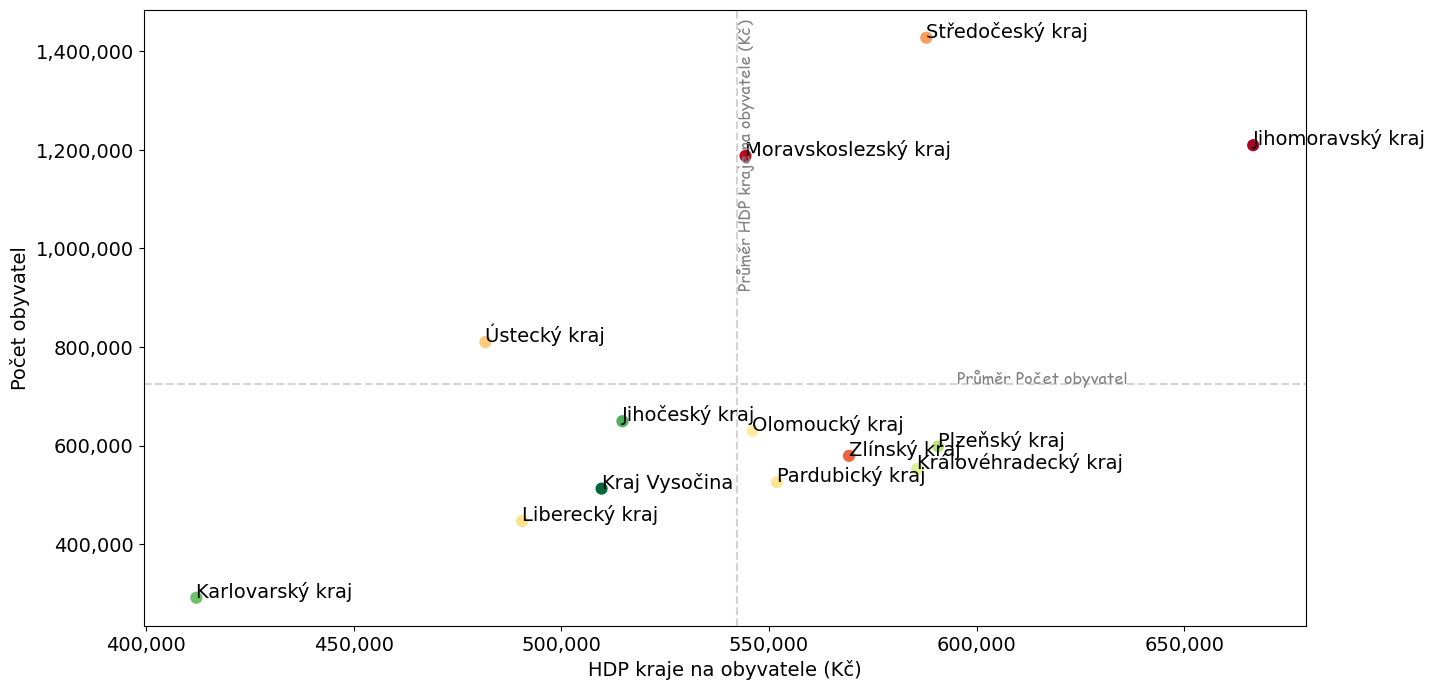

In [18]:
### počet obyv a HDP na obyv, a tloušťka pointu bude RUD na obyv - scatter
x=df_2a.loc[:,"HDP kraje na obyvatele (Kč)"]
y=df_2b.loc[:,"Počet obyvatel"]
s=df_2a.loc[:,"Příjmy z RUD na obyvatele (Kč)"]
n=df_2b.index

fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
ax.scatter(x, y,s=60,c=s,cmap="RdYlGn",label="Příjmy z RUD na obyvatele (Kč)") #c=((s/100-50)**2)/30
for i, txt in enumerate(n):
    if txt[0:3]=="Jih":
        ax.annotate(txt, (x.iloc[i], y.iloc[i]))
    else:
        ax.annotate(txt, (x.iloc[i], y.iloc[i]))
        
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel(x.name)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel(y.name)
ax.axhline(y=y.mean(), color="lightgrey", linestyle='--')
ax.text(x=(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.7),y=y.mean(),s=f"Průměr {y.name}",color="grey",fontsize="small",fontfamily="cursive")
ax.axvline(x=x.mean(), color="lightgrey", linestyle='--')
ax.text(x=x.mean(),y=(ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.55),s=f"Průměr {x.name}",color="grey",fontsize="small",rotation="vertical",fontfamily="cursive")
plt.show()

### 2.2. Přidáváme RUD - grafy 3a a 3b

In [19]:
rud=pd.read_excel("data/rud.xlsx",header=0,sheet_name="list",index_col="Kraj")
rud=rud.loc[kraje,:]
#adjust existing shares
for col in rud.columns:
    rud.loc[:,col]=rud.loc[:,col]*100/rud.loc[:,col].sum()


In [20]:
#udělat ze shares Kč
cond_rud=(df_p.Pol==1111)|(df_p.Pol==1112)|(df_p.Pol==1113)|(df_p.Pol==1121)|(df_p.Pol==1211)
rud_total=df_p.loc[cond_rud,["Kraj",year]].groupby("Kraj").sum().reindex(kraje).sum()
rud=rud*(rud_total.iloc[0]/100)
#udělat z Kč Kč na obyvatele
for col in rud.columns:
    rud.loc[kraje,col]=rud.loc[kraje,col]/obyv.loc[kraje,str(int(year)-1)].astype(float)

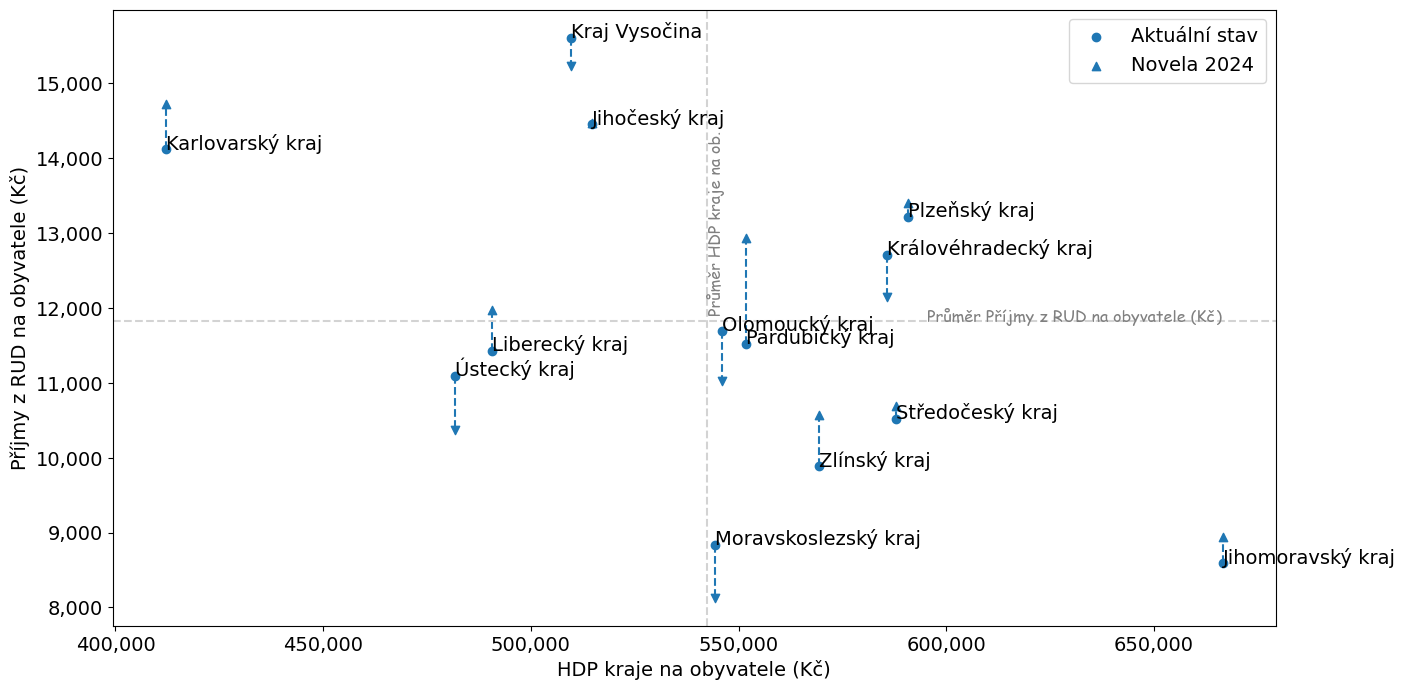

In [21]:
### RUD na obyv (před a po) vs HDP na obyv - scatter
y=df_2a.loc[kraje,"Příjmy z RUD na obyvatele (Kč)"]
y1=rud.loc[kraje,"Novela 2024"]
x=df_2a.loc[kraje,"HDP kraje na obyvatele (Kč)"]
n=df_2a.loc[kraje,:].index

l=[]
for kraj in kraje:
    cond=y1[kraj]>=y[kraj]

fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
ax.scatter(x, y,label="Aktuální stav",color="tab:blue")
cond=y1>=y
ax.scatter(x[cond], y1[cond],label=y1.name,color="tab:blue",marker="^")
ax.scatter(x[~cond], y1[~cond],color="tab:blue",marker="v")
#ax.scatter(np.nan,np.nan,label=y1.name,color="tab:blue",marker="d")

for i, txt in enumerate(n):
    if txt[0:3]=="Jih":
        ax.annotate(txt, (x.iloc[i], y.iloc[i]))
    else:
        ax.annotate(txt, (x.iloc[i], y.iloc[i]))

for kraj in kraje:        
    ax.axvline(x=x[kraj], ymin=(y[kraj]-ax.get_ylim()[0])/(ax.get_ylim()[1]-ax.get_ylim()[0]), ymax=(y1[kraj]-ax.get_ylim()[0])/(ax.get_ylim()[1]-ax.get_ylim()[0]),color="tab:blue",linestyle="--")

ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel(x.name)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel(y.name)
ax.axhline(y=y.mean(), color="lightgrey", linestyle='--')
ax.text(x=(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.7),y=y.mean(),s=f"Průměr {y.name}",color="grey",fontsize="small",fontfamily="cursive")
ax.axvline(x=x.mean(), color="lightgrey", linestyle='--')
ax.text(x=x.mean(),y=(ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.51),s=f"Průměr {x.name[0:15]}.",color="grey",fontsize="small",rotation="vertical",fontfamily="cursive")
ax.legend()
plt.savefig("graphs/graf_3.jpg",dpi=300,bbox_inches="tight")
df_exl=pd.DataFrame(y).rename(columns={y.name:"Aktuální stav"}).join(pd.DataFrame(y1)).join(pd.DataFrame(x))
df_exl.to_excel("graphs/graf_3.xlsx")
plt.show()

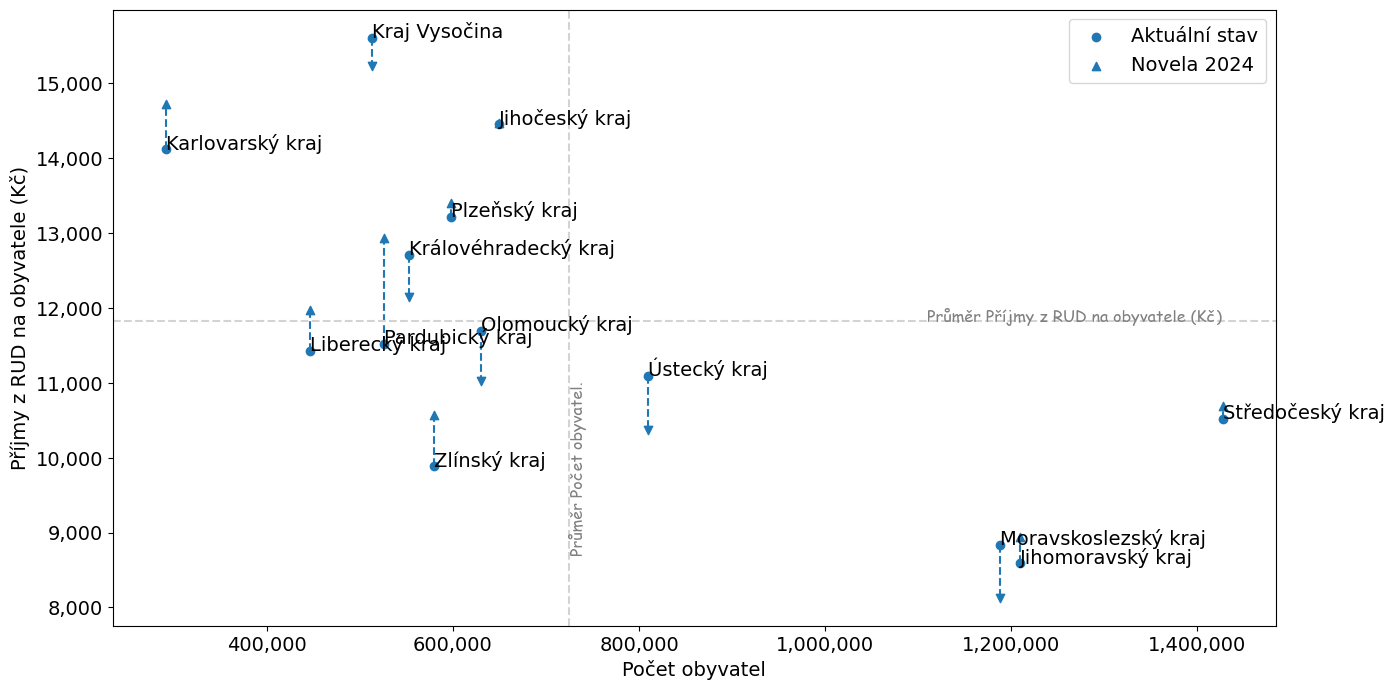

In [22]:
### RUD na obyv (před a po) vs počet obyvatel - scatter do přílohy
y=df_2b.loc[kraje,"Příjmy z RUD na obyvatele (Kč)"]
y1=rud.loc[kraje,"Novela 2024"]
x=df_2b.loc[kraje,"Počet obyvatel"]
n=df_2b.loc[kraje,:].index

l=[]
for kraj in kraje:
    cond=y1[kraj]>=y[kraj]

fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
ax.scatter(x, y,label="Aktuální stav",color="tab:blue")
cond=y1>=y
ax.scatter(x[cond], y1[cond],label=y1.name,color="tab:blue",marker="^")
ax.scatter(x[~cond], y1[~cond],color="tab:blue",marker="v")
#ax.scatter(np.nan,np.nan,label=y1.name,color="tab:blue",marker="d")

for i, txt in enumerate(n):
    if txt[0:3]=="Jih":
        ax.annotate(txt, (x.iloc[i], y.iloc[i]))
    else:
        ax.annotate(txt, (x.iloc[i], y.iloc[i]))

for kraj in kraje:        
    ax.axvline(x=x[kraj], ymin=(y[kraj]-ax.get_ylim()[0])/(ax.get_ylim()[1]-ax.get_ylim()[0]), ymax=(y1[kraj]-ax.get_ylim()[0])/(ax.get_ylim()[1]-ax.get_ylim()[0]),color="tab:blue",linestyle="--")

ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel(x.name)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel(y.name)
ax.axhline(y=y.mean(), color="lightgrey", linestyle='--')
ax.text(x=(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.7),y=y.mean(),s=f"Průměr {y.name}",color="grey",fontsize="small",fontfamily="cursive")
ax.axvline(x=x.mean(), color="lightgrey", linestyle='--')
ax.text(x=x.mean(),y=(ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.12),s=f"Průměr {x.name[0:17]}.",color="grey",fontsize="small",rotation="vertical",fontfamily="cursive")
ax.legend()
plt.savefig("graphs/graf_A3.jpg",dpi=300,bbox_inches="tight")
df_exl=pd.DataFrame(y).rename(columns={y.name:"Aktuální stav"}).join(pd.DataFrame(y1)).join(pd.DataFrame(x))
df_exl.to_excel("graphs/graf_A3.xlsx")
plt.show()

### 2.3. Bar chart - struktura příjmů a výdajů; Nová kategorizace

In [23]:
### Trida2 - nová kategorizace
trida2_cis=sesk_cis.copy()
for dataf in [df,df_v,df_p]:
    dataf.loc[:,"Trida2"]=dataf.loc[:,"Sesk"].copy()
    
    ### Příjmy
    ##Daně
    cond=(dataf.Sesk>10) & (dataf.Sesk<20)
    dataf.loc[cond,"Trida2"]=1
    trida2_cis[1]="Daňové příjmy" #jsou tam i správní poplatky
    ##Nedaně
    #cond=dataf.Sesk==21 #prijem z vlastni cinosti - malo
    cond=(dataf.Sesk>20)&(dataf.Sesk<30)
    dataf.loc[cond,"Trida2"]=2
    trida2_cis[2]="Nedaňové příjmy" #všechny
    ##Prodej - 
    cond=(dataf.Sesk>30) & (dataf.Sesk<40)
    dataf.loc[cond,"Trida2"]=2 #Davame do Nedanovych prijmu
    ##Transfery - zvlášť
#     for pol in [4116]: #4111,4112,4113, #4116: Klíčová položka, ideálně k něčemu napárovat
#         cond=dataf.Pol==pol
#         dataf.loc[cond,"Trida2"]=pol
  
    ### Výdaje (důležité nechat condition že Trida je 5 nebo 6, jinak hrozí přepsání příjmů teoreticky - ale asi ne, příjmy nemají paragrafy)
    ##Nejdřív ostatní běžné výdaje
    cond=(dataf.Trida=="Běžné výdaje")
    dataf.loc[cond,"Trida2"]=5000
    trida2_cis[5000]="Ostatní výdaje"
    ##Ostatní kapitálové výdaje - zde spolu s běžnými
    cond1=(dataf.Trida=="Kapitálové výdaje")
    dataf.loc[cond1,"Trida2"]=5000
    #trida2_cis[6000]="Ostatní kapitálové výdaje" 
    ##Školství #### Zakladni skolství: Pol 5339, Neinv. transfery *cizím* příspěv. org.; Střední školství: 5336, Neinv. tr. zřízeným přísp. org.
    condsk=(dataf.Para>=3111)&(dataf.Para<=3299)
    dataf.loc[((cond)|(cond1))&(condsk),"Trida2"]=501
    trida2_cis[501]="Školství a vzdělávání"
    ##Doprava 1
    condd=(dataf.Para==2212)
    dataf.loc[((cond)|(cond1))&(condd),"Trida2"]=502
    trida2_cis[502]="Silnice" 
    ##Doprava 2
    condd2=(dataf.Para==2221)|(dataf.Para==2292)|(dataf.Para==2294)|(dataf.Para==2295)
    dataf.loc[((cond)|(cond1))&(condd2),"Trida2"]=503
    trida2_cis[503]="Veřejná doprava" 
    ##Sociální služby
    condsoc=(dataf.Para>=4311)&(dataf.Para<=4399)
    dataf.loc[((cond)|(cond1))&(condsoc),"Trida2"]=504
    trida2_cis[504]="Sociální služby"
    ##Zdravotnictví - zrovna tady by to chtělo rozdělení na investice? Ale nezabrušoval bych asi...
    condzdr=(dataf.Para>=3511)&(dataf.Para<=3599)
    dataf.loc[((cond)|(cond1))&(condzdr),"Trida2"]=505
    trida2_cis[505]="Zdravotnictví"  
    ##Veřejná správa
    condvs=(dataf.Para>=6112)&(dataf.Para<=6219)
    dataf.loc[((cond)|(cond1))&(condvs),"Trida2"]=506
    trida2_cis[506]="Veřejná správa"
#     ##Humanitární pomoc
#     condkul=(dataf.Para>=6221)&(dataf.Para<=6229)
#     dataf.loc[((cond)|(cond1))&(condkul),"Trida2"]=507
#     trida2_cis[507]="Humanitární pomoc"
    ##Kultura
    condkul=(dataf.Para>=3311)&(dataf.Para<=3399)
    dataf.loc[((cond)|(cond1))&(condkul),"Trida2"]=508
    trida2_cis[508]="Kultura"
#     ##Odpady
#     condkul=(dataf.Para>=3721)&(dataf.Para<=3729)
#     dataf.loc[((cond)|(cond1))&(condkul),"Trida2"]=509
#     trida2_cis[509]="Odpady"
#     ##Bezpečnost
#     condkul=(dataf.Para>=5311)&(dataf.Para<=5311)
#     dataf.loc[((cond)|(cond1))&(condkul),"Trida2"]=510
#     trida2_cis[510]="Bezpečnost"


C:\Users\32563404\AppData\Local\Temp\ipykernel_17960\655181657.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf.loc[:,"Trida2"]=dataf.loc[:,"Sesk"].copy()
C:\Users\32563404\AppData\Local\Temp\ipykernel_17960\655181657.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf.loc[:,"Trida2"]=dataf.loc[:,"Sesk"].copy()


In [76]:
year="2023" #2024 problém v datech
df_graph_p=pd.DataFrame({})
df_graph_v=pd.DataFrame({})
for kraj in kraje:
    df_aux1=df_p.loc[df_p.Kraj==kraj,[year,"Trida2"]].groupby("Trida2").sum().rename(columns={year:kraj})
    for ind in df_aux1.index:
        df_graph_p.loc[ind,kraj]=df_aux1.loc[ind,kraj]
    df_aux2=df_v.loc[df_v.Kraj==kraj,[year,"Trida2"]].groupby("Trida2").sum().rename(columns={year:kraj})
    for ind in df_aux2.index:
        df_graph_v.loc[ind,kraj]=df_aux2.loc[ind,kraj]

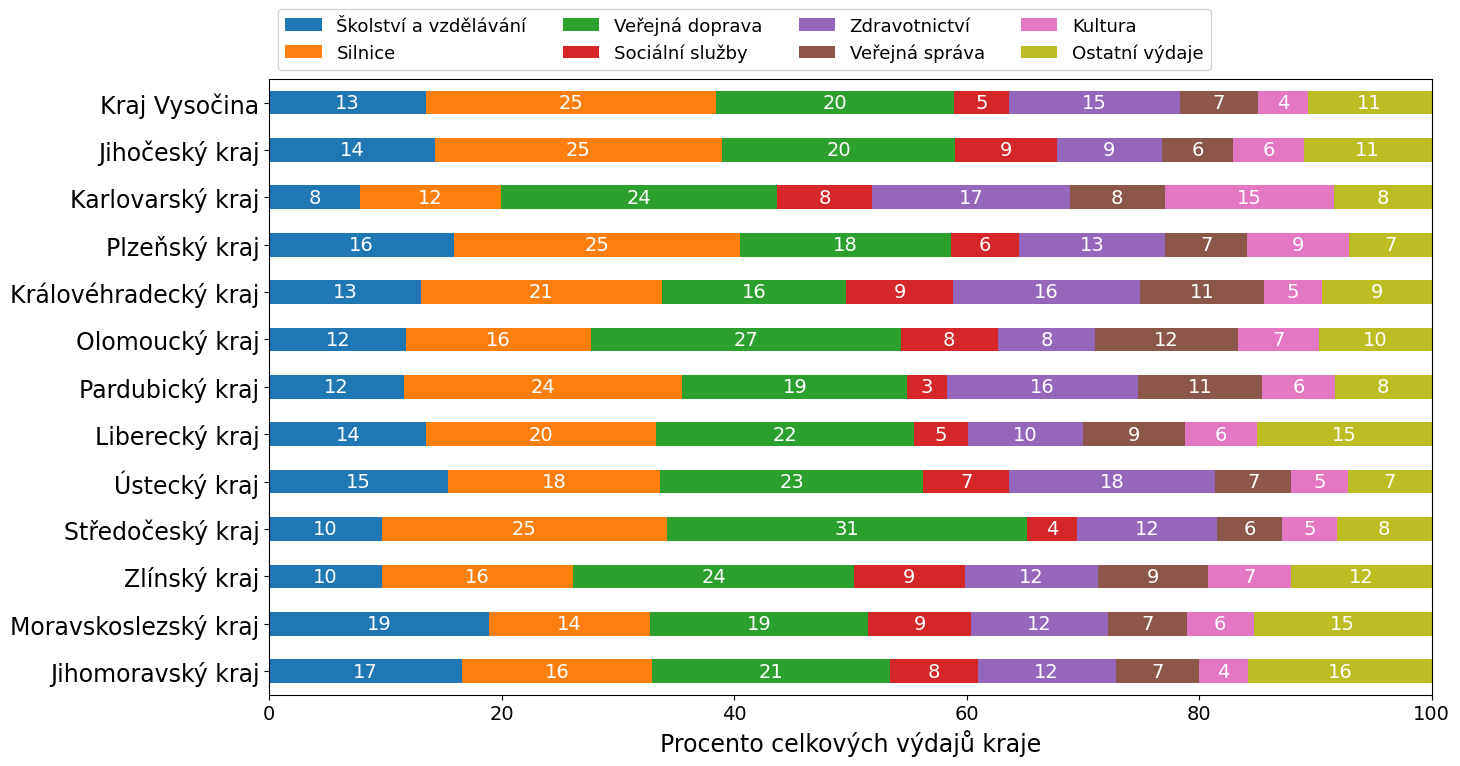

In [77]:
### stacked graf struktura výdajů s Prahou
kraje.append("Hlavní město Praha")
data=df_graph_v/df_graph_v.sum(axis=0)*100
data=data.iloc[:,::-1]
fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
size1=17
size2=19

data_cum=data.cumsum(axis=0)
category_colors = matplotlib.colormaps['tab10'](np.linspace(0, 0.8, data.shape[0]))
#category_colors=["tab:blue","lightblue","lightgreen","violet"]
labels = data.columns
y=np.arange(len(labels))

i=0
for kap in data.index:
    widths = data.iloc[i, :]
    starts = data_cum.iloc[i, :] - widths
    if kap=="Ostatní": #set manual color
        color="lightgrey"
        
    else:
        color=category_colors[i]
    rects = ax.barh(y, widths, left=starts,height=0.5,label=trida2_cis[kap],color=color)
    try:
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    except: #this happens if we set manual color
        text_color="black"
    ax.bar_label(rects, label_type='center', color=text_color,labels=np.round(np.array(data.iloc[i,:]),0).astype(int))    
    i+=1
    
ax.set_ylim(top=len(labels)-0.5,bottom=-0.5)
ax.set_xlim(right=100)
ax.set_yticks(y)
ax.set_yticklabels(labels,size=size1)    
ax.legend(ncol=4, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=13.1)
ax.set_xlabel("Procento celkových výdajů kraje",size=size1)
plt.savefig("graphs/graf_A6a_DP.png",bbox_inches='tight')
data.rename(index=trida2_cis).to_excel(f"graphs/graf_A6a_DP.xlsx")
kraje.remove("Hlavní město Praha")
plt.show() #Vysočina má miliardu a půl v "ostatních" (r. 2022; položka i paragraf). U Prahy je to 5 p.b. svoz odpadů a policie (věci, co dělá město)

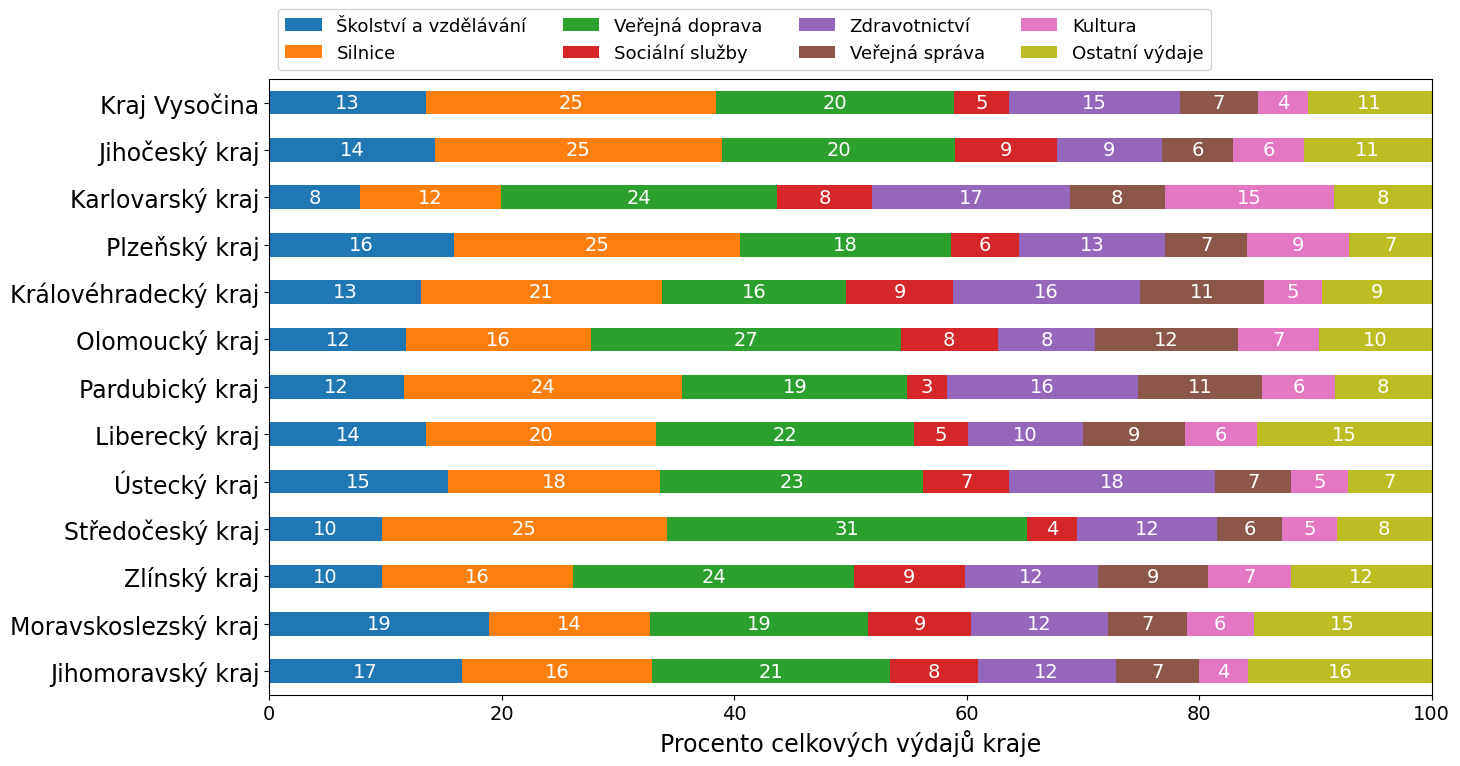

In [78]:
### stacked graf struktura výdajů
data=df_graph_v.loc[:,kraje]/df_graph_v.loc[:,kraje].sum(axis=0)*100
data=data.iloc[:,::-1]
fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
size1=17
size2=19

data_cum=data.cumsum(axis=0)
category_colors = matplotlib.colormaps['tab10'](np.linspace(0, 0.8, data.shape[0]))
#category_colors=["tab:blue","lightblue","lightgreen","violet"]
labels = data.columns
y=np.arange(len(labels))

i=0
for kap in data.index:
    widths = data.iloc[i, :]
    starts = data_cum.iloc[i, :] - widths
    if kap=="Ostatní": #set manual color
        color="lightgrey"
        
    else:
        color=category_colors[i]
    rects = ax.barh(y, widths, left=starts,height=0.5,label=trida2_cis[kap],color=color)
    try:
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    except: #this happens if we set manual color
        text_color="black"
    ax.bar_label(rects, label_type='center', color=text_color,labels=np.round(np.array(data.iloc[i,:]),0).astype(int))    
    i+=1
    
ax.set_ylim(top=len(labels)-0.5,bottom=-0.5)
ax.set_xlim(right=100)
ax.set_yticks(y)
ax.set_yticklabels(labels,size=size1)    
ax.legend(ncol=4, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=13.1)
ax.set_xlabel("Procento celkových výdajů kraje",size=size1)
plt.savefig("graphs/graf_6.png",bbox_inches='tight')
data.rename(index=trida2_cis).to_excel(f"graphs/graf_6.xlsx")
plt.show() #Vysočina má miliardu a půl v "ostatních" (r. 2022; položka i paragraf). U Prahy je to 5 p.b. svoz odpadů a policie (věci, co dělá město)

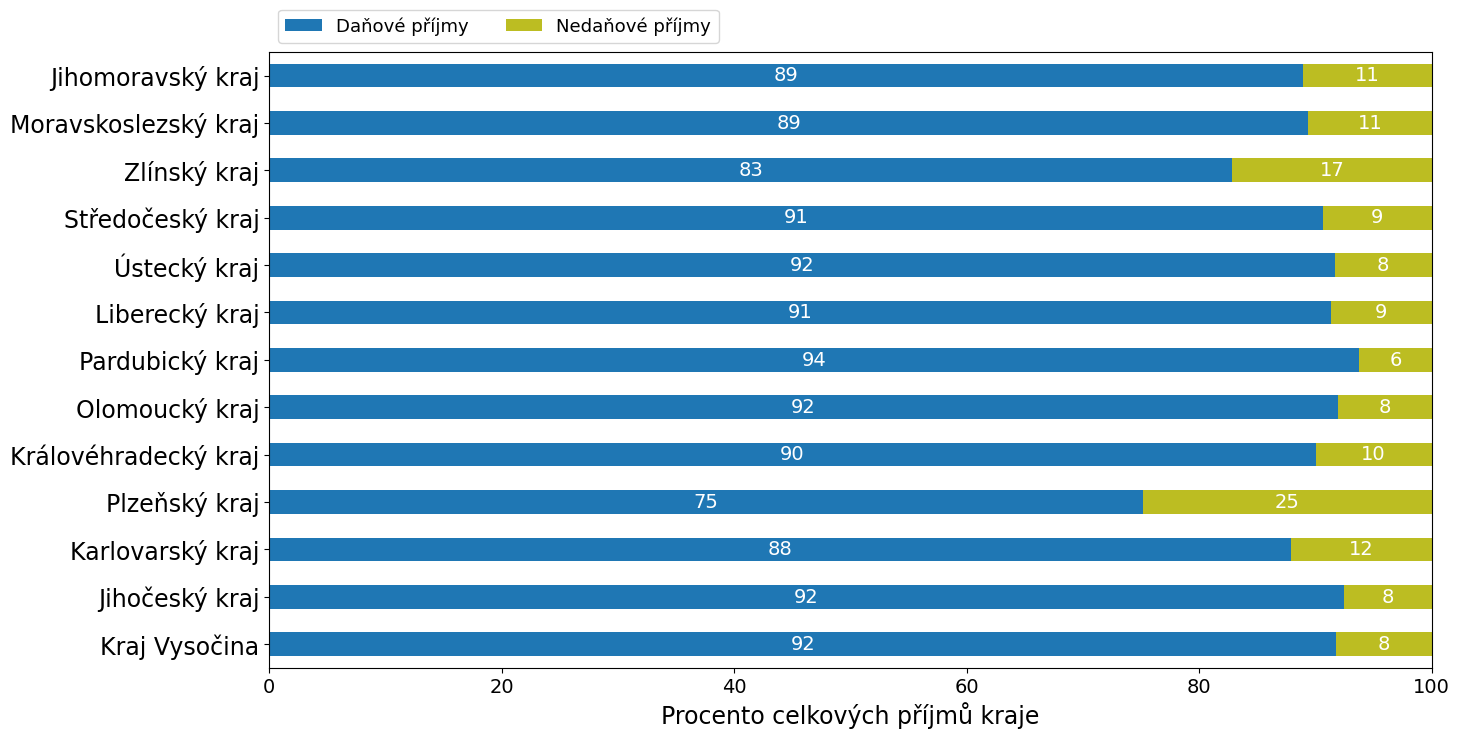

In [27]:
### stacked graf struktura příjmů
data=df_graph_p/df_graph_p.sum(axis=0)*100
fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
size1=17
size2=19

data_cum=data.cumsum(axis=0)
category_colors = matplotlib.colormaps['tab10'](np.linspace(0, 0.8, data.shape[0]))
#category_colors=["tab:blue","lightblue","lightgreen","violet"]
labels = data.columns
y=np.arange(len(labels))

i=0
for kap in data.index:
    widths = data.iloc[i, :]
    starts = data_cum.iloc[i, :] - widths
    if kap=="Ostatní": #set manual color
        color="lightgrey"
        
    else:
        color=category_colors[i]
    rects = ax.barh(y, widths, left=starts,height=0.5,label=trida2_cis[kap],color=color)
    try:
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    except: #this happens if we set manual color
        text_color="black"
    ax.bar_label(rects, label_type='center', color=text_color,labels=np.round(np.array(data.iloc[i,:]),0).astype(int))  
    i+=1
    
ax.set_ylim(top=len(labels)-0.5,bottom=-0.5)
ax.set_xlim(right=100)
ax.set_yticks(y)
ax.set_yticklabels(labels,size=size1)    
ax.legend(ncol=int(len(data.index)/1), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=13.1)
ax.set_xlabel("Procento celkových příjmů kraje",size=size1)
#plt.savefig("graphs/graf_2.png",bbox_inches='tight')
#data.rename(index=trida2_cis).to_excel(f"graphs/graf_2.xlsx")
plt.show()

rozdělit dopravu? místo humanitární pomoci? Anebo ne, ale udělat ještě tři čtyři podgrafy? 
(Třeba tři: Školství;Doprava a zdravotnictví; Veřejná správa, Kultura a Ostatní)

Skoro-waterfall SR, obcí, krajů? Aby bylo vidět, co se překrývá?

HDP a růst HDP do grafu, kvadranty

Seřazení krajů?



### 2.3. Podgrafy výdajů

#### 2.3.1. Školství

In [28]:
df_vv=df_v.loc[df_v.Trida2==501,:].copy()
trida3_cis=para_cis.copy()
df_vv.loc[:,"Trida3"]=df_vv.loc[:,"Para"].copy()
trida3_cis[9999]="Ostatní"
## Zakladni skolstvi
condsk=(df_vv.Para==3111)|(df_vv.Para==3112)|(df_vv.Para==3115)
df_vv.loc[condsk,"Trida3"]=0
trida3_cis[0]="Předškolní vzdělávání"
## Zakladni skolstvi
condsk=(df_vv.Para==3113)|(df_vv.Para==3114)|(df_vv.Para==3117)|(df_vv.Para==3118)|(df_vv.Para==3119)
df_vv.loc[condsk,"Trida3"]=1
trida3_cis[1]="Základní vzdělávání"
## Stredni skolstvi
condsk=(df_vv.Para>=3121)&(df_vv.Para<=3129)#&(df_vv.Para!=3126) konzervatoř
df_vv.loc[condsk,"Trida3"]=2
trida3_cis[2]="Střední vzdělávání "
## Vysoké školství - spadne do ostatních
condsk=(df_vv.Para>=3211)&(df_vv.Para<=3219)
df_vv.loc[condsk,"Trida3"]=3
trida3_cis[3]="Vysokoškolské vzdělávání"
# ## Ústavy a dětské domovy
# condsk=(df_vv.Para>=3131)&(df_vv.Para<=3139)
# df_vv.loc[condsk,"Trida3"]=3
# trida3_cis[3]="Ústavy a dětské domovy"
# ## Kapitálové výdaje
# condk=df_vv.Trida=="Kapitálové výdaje" #Většina je běžných
# df_vv.loc[condk,"Trida3"]=50
# trida3_cis[50]="Kapitálové výdaje"


In [29]:
#merge small para
for para in df_vv.Trida3.unique():
    if (df_vv.loc[df_vv.Trida3==para,year].sum())<1*(10**9):
        df_vv.loc[df_vv.Trida3==para,"Trida3"]=9999
#make df_graph
df_graph_vv=pd.DataFrame({})
for kraj in kraje:
    df_aux=df_vv.loc[df_vv.Kraj==kraj,[year,"Trida3"]].groupby("Trida3").sum().rename(columns={year:kraj})
    for ind in df_aux.index:
        df_graph_vv.loc[ind,kraj]=df_aux.loc[ind,kraj]

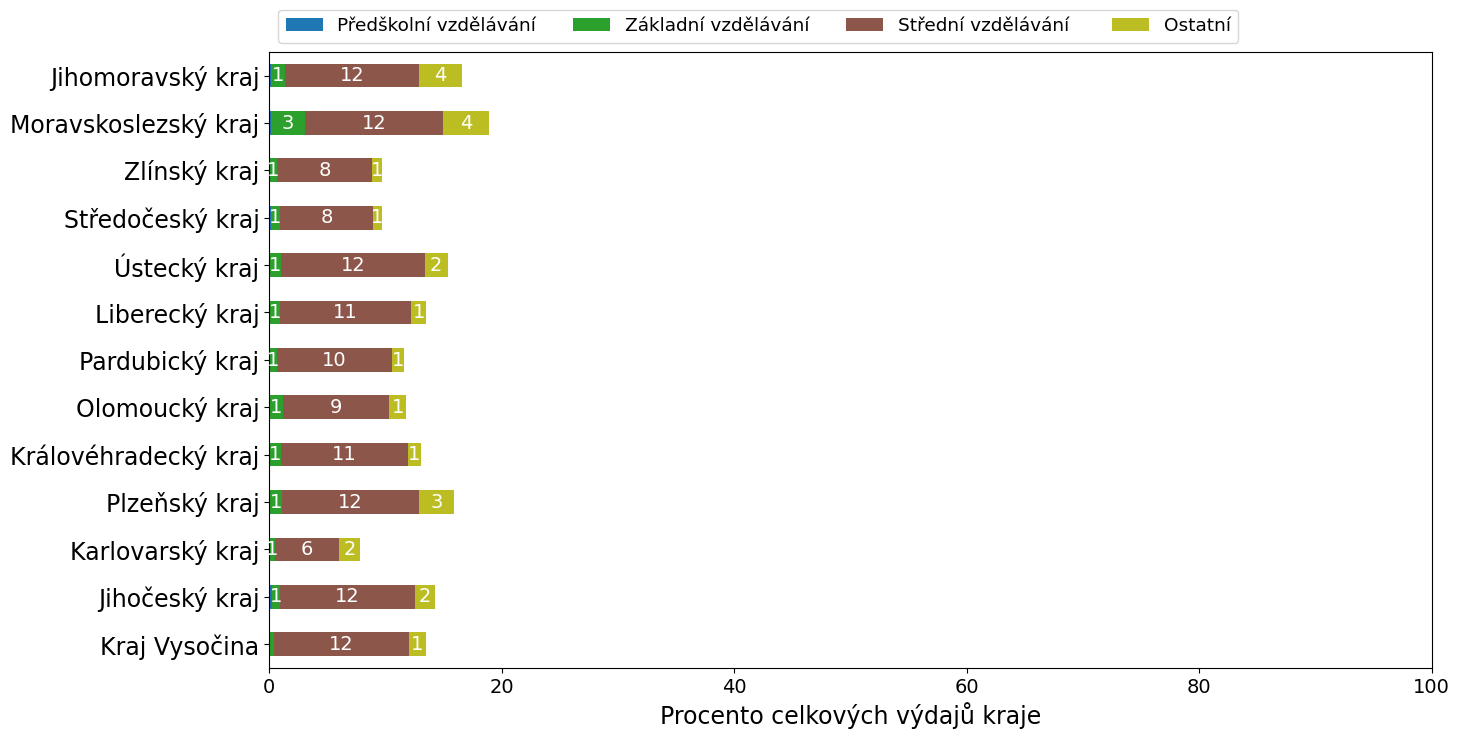

In [30]:
data=df_graph_vv/df_graph_v.sum(axis=0)*100

fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
size1=17
size2=19

data_cum=data.cumsum(axis=0)
category_colors = matplotlib.colormaps['tab10'](np.linspace(0, 0.8, data.shape[0]))
#category_colors=["tab:blue","lightblue","lightgreen","violet"]
labels = data.columns
y=np.arange(len(labels))

i=0
for kap in data.index:
    widths = data.iloc[i, :]
    starts = data_cum.iloc[i, :] - widths
    if kap=="Ostatní": #set manual color
        color="lightgrey"
        
    else:
        color=category_colors[i]
    rects = ax.barh(y, widths, left=starts,height=0.5,label=trida3_cis[kap],color=color)
    try:
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    except: #this happens if we set manual color
        text_color="white"
    
    a=np.round(np.array(data.iloc[i,:]),0).astype(int).astype(str)
    a[a=="0"]=""
    ax.bar_label(rects, label_type='center', color=text_color,labels=a)    
    i+=1
    
ax.set_ylim(top=len(labels)-0.5,bottom=-0.5)
ax.set_xlim(right=100)
ax.set_yticks(y)
ax.set_yticklabels(labels,size=size1)    
ax.legend(ncol=4, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=13.3)
ax.set_xlabel("Procento celkových výdajů kraje",size=size1)
plt.savefig("graphs/graf_A3b.png",bbox_inches='tight')
data.rename(index=trida3_cis).to_excel("graphs/graf_A3b.xlsx")
plt.show()

#### 2.3.2. Další různé kategorie výdajů (paragrafy)

In [100]:

df_vv=df_v.loc[df_v.Trida2==508,:].copy()
trida3_cis=para_cis.copy()
df_vv.loc[:,"Trida3"]=df_vv.loc[:,"Para"].copy()
# trida3_cis=pol_cis.copy()
# df_vv.loc[:,"Trida3"]=df_vv.loc[:,"Pol"].copy()
trida3_cis[9999]="Ostatní "



In [101]:
#merge small para
for para in df_vv.Trida3.unique():
    if ((df_vv.loc[df_vv.Trida3==para,year].sum())<0.5*(10**9)) & (para!=3312):
        df_vv.loc[df_vv.Trida3==para,"Trida3"]=9999
#make df_graph
df_graph_vv=pd.DataFrame({})
for kraj in kraje:
    df_aux=df_vv.loc[df_vv.Kraj==kraj,[year,"Trida3"]].groupby("Trida3").sum().rename(columns={year:kraj})
    for ind in df_aux.index:
        df_graph_vv.loc[ind,kraj]=df_aux.loc[ind,kraj]

C:\Users\32563404\AppData\Local\Temp\ipykernel_17960\2783013231.py:30: RuntimeWarning: invalid value encountered in cast
  a=np.round(np.array(data.iloc[i,:]),0).astype(int).astype(str)


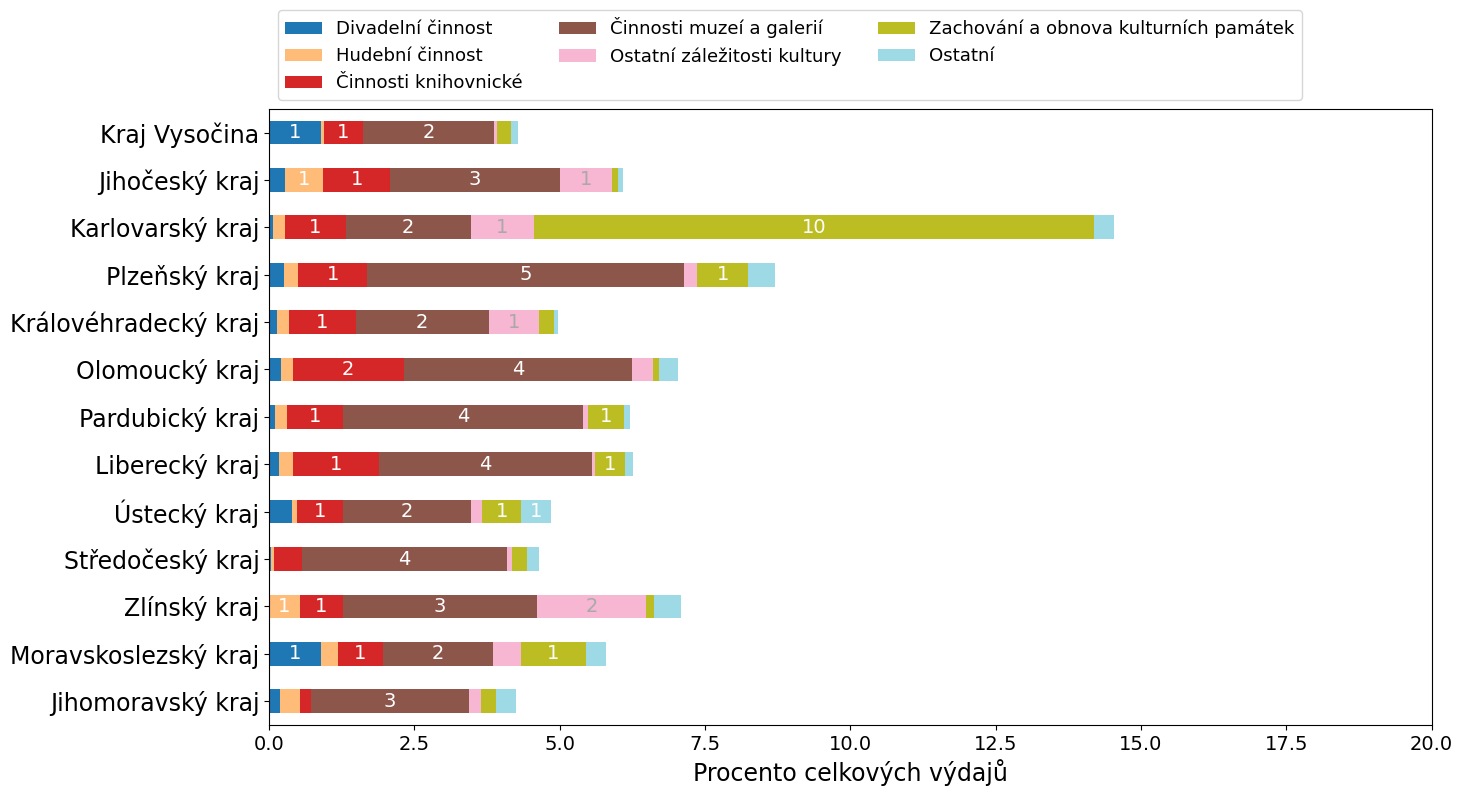

In [102]:
data=df_graph_vv.loc[:,kraje]/df_graph_v.loc[:,kraje].sum(axis=0)*100
data=data.iloc[:,::-1]
fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
size1=17
size2=19

data_cum=data.cumsum(axis=0)
category_colors = matplotlib.colormaps['tab20'](np.linspace(0, 1, data.shape[0]))
#category_colors=["tab:blue","lightblue","lightgreen","violet"]
labels = data.columns
y=np.arange(len(labels))

i=0
for kap in data.index:
    widths = data.iloc[i, :]
    starts = data_cum.iloc[i, :] - widths
    if kap=="Ostatní": #set manual color
        color="lightgrey"
        
    else:
        color=category_colors[i]
    rects = ax.barh(y, widths, left=starts,height=0.5,label=trida3_cis[kap],color=color)
    try:
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    except: #this happens if we set manual color
        text_color="black"
    
    a=np.round(np.array(data.iloc[i,:]),0).astype(int).astype(str)
    a[a=="0"]=""
    ax.bar_label(rects, label_type='center', color=text_color,labels=a)    
    i+=1
    
ax.set_ylim(top=len(labels)-0.5,bottom=-0.5)
ax.set_xlim(right=20)
ax.set_yticks(y)
ax.set_yticklabels(labels,size=size1)    
ax.legend(ncol=3, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=13.1)
ax.set_xlabel("Procento celkových výdajů",size=size1)
plt.savefig("graphs/graf_Ostatni_paragrafy.png",bbox_inches='tight',dpi=500)
data.rename(index=trida3_cis).to_excel("graphs/graf_Ostatni_paragrafy.xlsx")
plt.show()

#### 2.3.3. Další různé kategorie příjmů (položky)

Code copied, bad labels

In [35]:
df_p.Trida2.unique()

array([1, 2], dtype=int64)

In [36]:
df_vv=df_p.loc[df_p.Trida2==2,:].copy()
trida3_cis=pol_cis.copy()
df_vv.loc[:,"Trida3"]=df_vv.loc[:,"Pol"].copy()
trida3_cis[9999]="Ostatní"

#merge small polo
for para in df_vv.Trida3.unique():
    if (df_vv.loc[df_vv.Trida3==para,year].sum())<0.2*(10**9):
        df_vv.loc[df_vv.Trida3==para,"Trida3"]=9999
        
#make df_graph
df_graph_vv=pd.DataFrame({})
for kraj in kraje:
    df_aux=df_vv.loc[df_vv.Kraj==kraj,[year,"Trida3"]].groupby("Trida3").sum().rename(columns={year:kraj})
    for ind in df_aux.index:
        df_graph_vv.loc[ind,kraj]=df_aux.loc[ind,kraj]

C:\Users\32563404\AppData\Local\Temp\ipykernel_22064\2933974661.py:30: RuntimeWarning: invalid value encountered in cast
  a=np.round(np.array(data.iloc[i,:]),0).astype(int).astype(str)


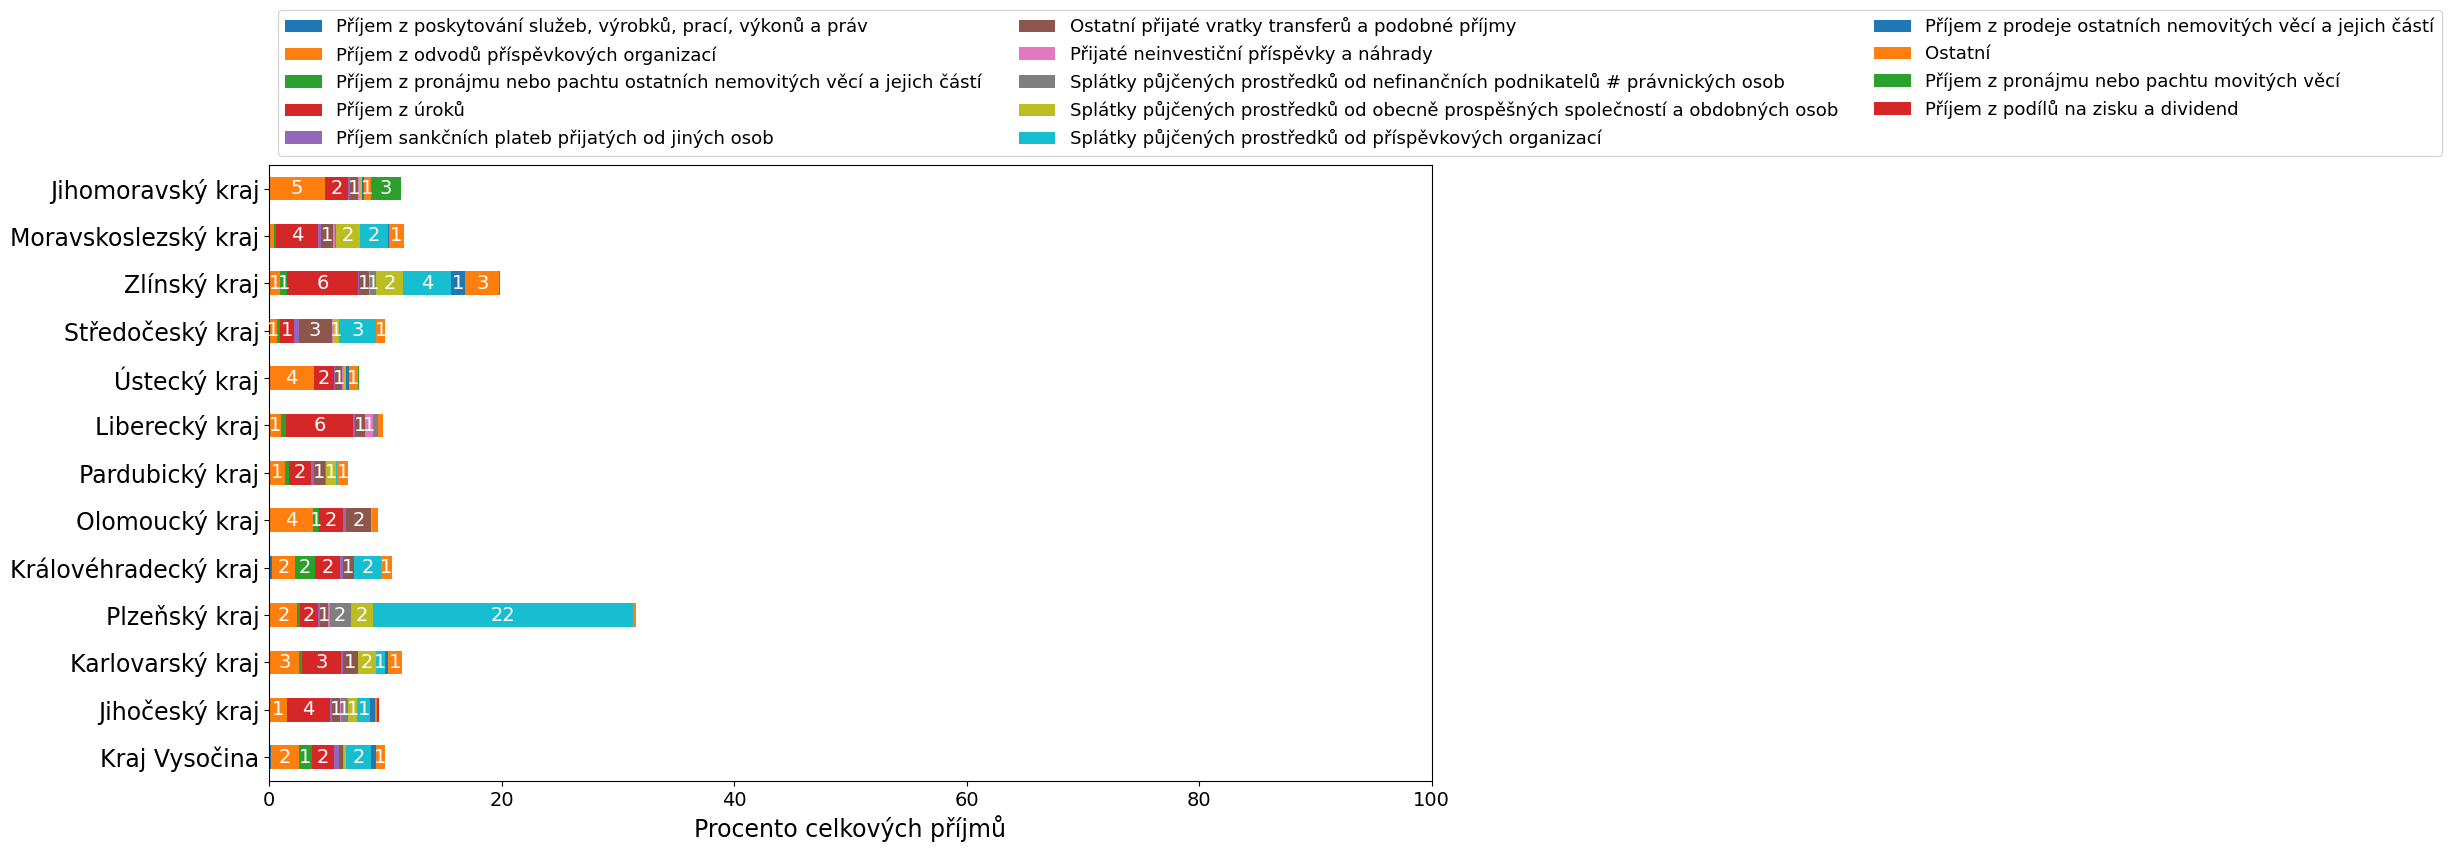

In [37]:
data=df_graph_vv/df_graph_v.sum(axis=0)*100

fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
size1=17
size2=19

data_cum=data.cumsum(axis=0)
#category_colors = matplotlib.colormaps['tab10'](np.linspace(0, 0.8, data.shape[0]))
#category_colors=["tab:blue","lightblue","lightgreen","violet"]
labels = data.columns
y=np.arange(len(labels))

i=0
for kap in data.index:
    widths = data.iloc[i, :]
    starts = data_cum.iloc[i, :] - widths
    if kap=="Ostatní": #set manual color
        color="lightgrey"
        
    else:
        True
    rects = ax.barh(y, widths, left=starts,height=0.5,label=trida3_cis[kap])
    try:
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    except: #this happens if we set manual color
        text_color="black"
    
    a=np.round(np.array(data.iloc[i,:]),0).astype(int).astype(str)
    a[a=="0"]=""
    ax.bar_label(rects, label_type='center', color=text_color,labels=a)    
    i+=1
    
ax.set_ylim(top=len(labels)-0.5,bottom=-0.5)
ax.set_xlim(right=100)
ax.set_yticks(y)
ax.set_yticklabels(labels,size=size1)    
ax.legend(ncol=3, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=13.1)
ax.set_xlabel("Procento celkových příjmů",size=size1)
plt.show()

### 2.4. Výdaje kryté transfery

In [38]:
# #### load data of transfers
# df1t=pd.read_excel("data/2023_VKT_1.xlsx",header=4,sheet_name="MON1TOR EXPORT")
# df2t=pd.read_excel("data/2023_VKT_2.xlsx",header=4,sheet_name="MON1TOR EXPORT")
# df23=pd.concat([df1t, df2t], ignore_index=True)
# df23
# a=df23['Výsledek výdajů od počátku roku'].sum()

# ### rename & keep specific columns
# df23cols={"Organizace (název)":"Kraj","Třída položek výdaje  (název)":"Trida","Seskupení položek (kód) ":"Sesk","Podseskupení položek (kód)":"Podsesk",
#         "Položka výdaje (kód)":"Pol","Paragraf výdaje (kód)":"Para",
#          'Výsledek výdajů od počátku roku':"2023 VKT"} # chybi oproti SR "Zdroj (kód)":"Zdroj","Kapitola (název)":"Kapitola",
# df23=df23.loc[:,df23cols.keys()].copy()
# df23.columns=df23cols.values() 
# b=df23["2023 VKT"].sum()
# if a!=b: raise (ValueError) #sum of výdaje holds

# ##merge with the main dataset
# df23=df23.groupby(['Kraj', 'Trida', 'Sesk', 'Podsesk', 'Pol', 'Para']).sum().reset_index()
# df_vkt=df_v.merge(df23,on=['Kraj', 'Trida', 'Sesk', 'Podsesk', 'Pol', 'Para'],how="left",validate="one_to_one")
# df_vkt.loc[:,'2023 VKT'] = df_vkt.loc[:,'2023 VKT'].fillna(0)
# df_vkt.loc[:,'2023 BEZVKT']=df_vkt.loc[:,'2023']-df_vkt.loc[:,'2023 VKT']

In [39]:
df_vkt=df_v.copy()
df_vkt.loc[:,"2023 BEZVKT"]=df_vkt.loc[:,"2023"].copy()
df_vkt.loc[:,"2023"]=df_vkt.loc[:,"2023"]+df_vkt.loc[:,"2023 VKT"]

In [40]:
#df_vkt.sort_values(by="2023").head(4) 
###Rozpočet je snížen o 838.014 tis. Kč z důvodu očekávané vratky
#DPH od finančního úřadu, která bude uhrazena v rámci platby
#faktur dodavateli železničních elektrických jednotek. Výdaje akce
#jsou záporné, protože příjmy z vratek DPH se účtují do výdajů

In [41]:
### dobrá zpráva: Odečtením VKT se problém neamplifikuje. Viz df_vkt.sort_values(by="2023 BEZVKT")

In [42]:
kraje.append("Hlavní město Praha")

In [43]:
df_graph_vkt=pd.DataFrame({})
for kraj in kraje:
    df_aux=df_vkt.loc[df_vkt.Kraj==kraj,["2023","Trida2"]].groupby("Trida2").sum().rename(columns={"2023":kraj})
    for ind in df_aux.index:
        df_graph_vkt.loc[ind,kraj]=df_aux.loc[ind,kraj]
#většinou jsou VKT o něco menší než investiční plus neinvestiční přijaté transfery, což je asi encouraging. Výjimka je Karlovarský kraj.

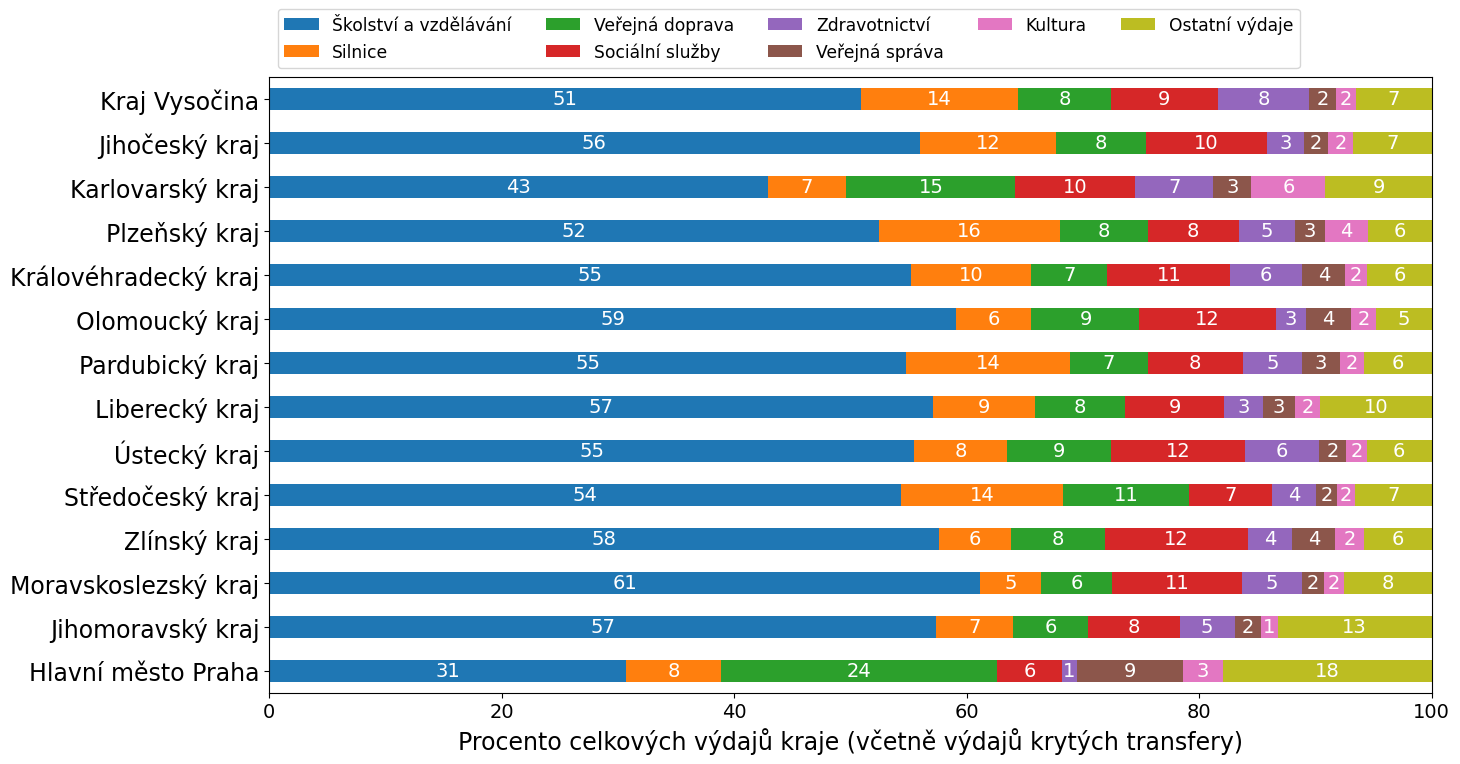

In [45]:
### stacked graf
data=df_graph_vkt/df_graph_vkt.sum(axis=0)*100
data=data.iloc[:,::-1]
fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
size1=17
size2=19

data_cum=data.cumsum(axis=0)
category_colors = matplotlib.colormaps['tab10'](np.linspace(0, 0.8, data.shape[0]))
#category_colors=["tab:blue","lightblue","lightgreen","violet"]
labels = data.columns
y=np.arange(len(labels))

i=0
for kap in data.index:
    widths = data.iloc[i, :]
    starts = data_cum.iloc[i, :] - widths
    if kap==99999: #set manual color
        color="lightgrey"
        
    else:
        color=category_colors[i]
    rects = ax.barh(y, widths, left=starts,height=0.5,label=trida2_cis[kap],color=color)
    try:
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    except: #this happens if we set manual color
        text_color="white"
    ax.bar_label(rects, label_type='center', color=text_color,labels=np.round(np.array(data.iloc[i,:]),0).astype(int))    
    i+=1
    
ax.set_ylim(top=len(labels)-0.5,bottom=-0.5)
ax.set_xlim(right=100)
ax.set_yticks(y)
ax.set_yticklabels(labels,size=size1)    
ax.legend(ncol=5, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=12.3)
ax.set_xlabel("Procento celkových výdajů kraje (včetně výdajů krytých transfery)",size=size1)
plt.savefig("graphs/graf_A6b.png",bbox_inches='tight')
data.rename(index=trida2_cis).to_excel(f"graphs/graf_A6b.xlsx")
plt.show() #Vysočina má miliardu a půl v "ostatních" (r. 2022; položka i paragraf). U Prahy je to 5 p.b. svoz odpadů a policie (věci, co dělá město)

C:\Users\32563404\AppData\Local\Temp\ipykernel_8408\4225417101.py:49: RuntimeWarning: invalid value encountered in cast
  a=np.round(np.array(data.iloc[i,:]),0).astype(int).astype(str)


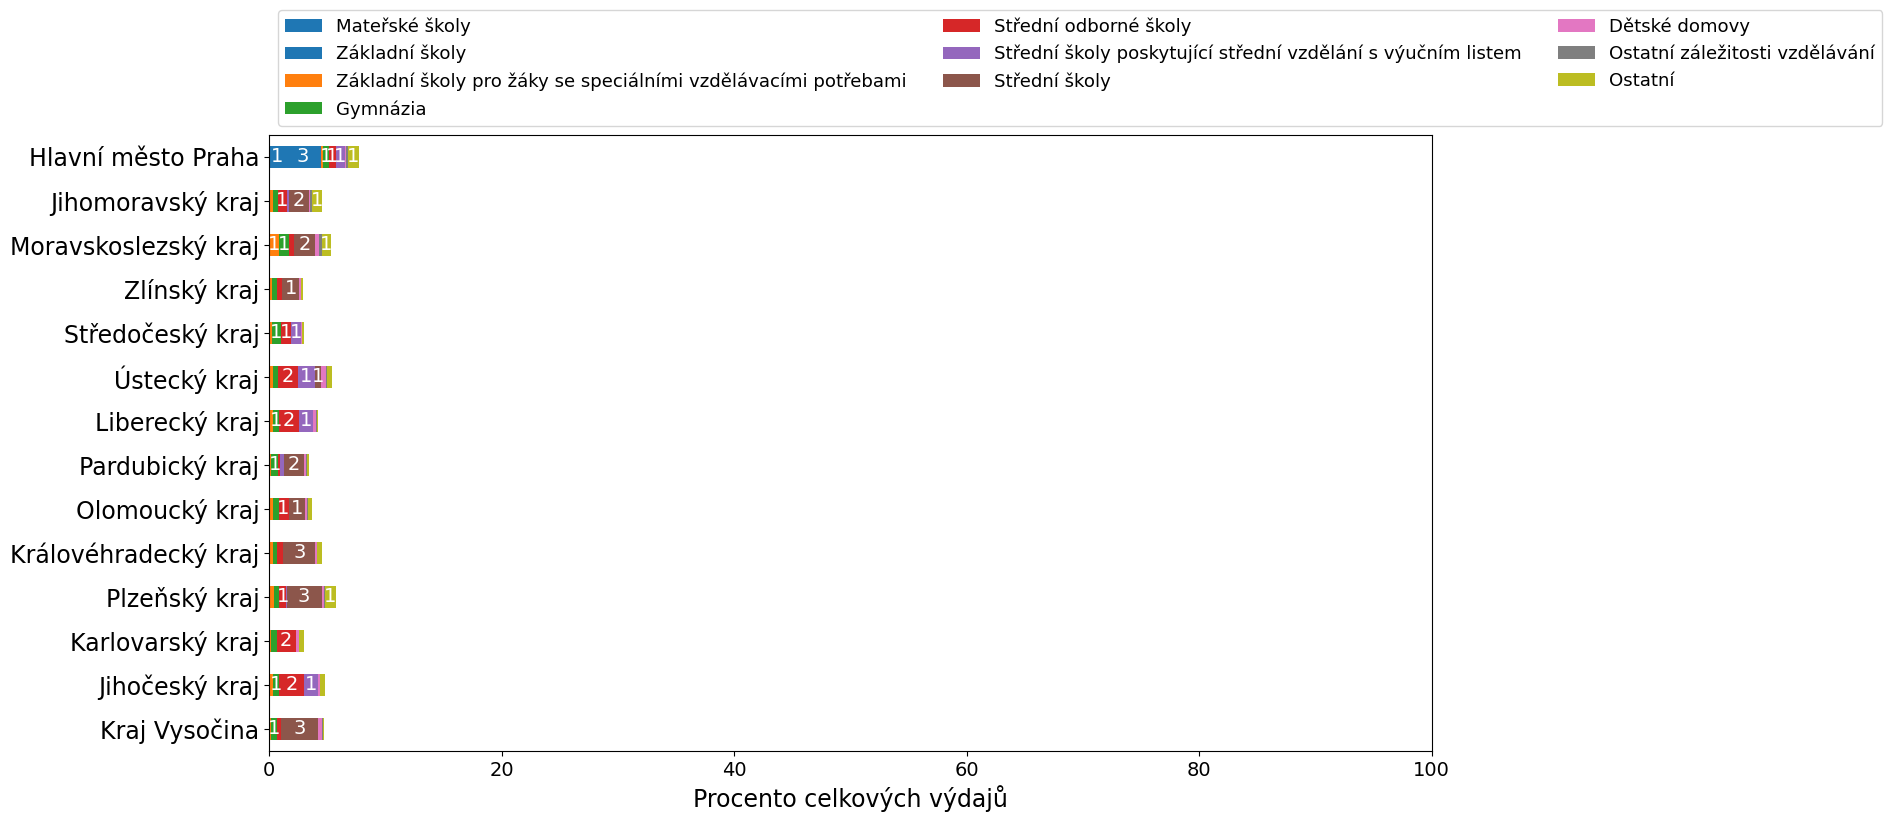

In [46]:
###Skolstvi - closer look
year="2023 BEZVKT"
df_vv=df_vkt.loc[df_vkt.Trida2==501,:].copy()
trida3_cis=para_cis.copy()
df_vv.loc[:,"Trida3"]=df_vv.loc[:,"Para"].copy()
trida3_cis[9999]="Ostatní"

#merge small polo
for para in df_vv.Trida3.unique():
    if (df_vv.loc[df_vv.Trida3==para,year].sum())<0.5*(10**9):
        df_vv.loc[df_vv.Trida3==para,"Trida3"]=9999
#make df_graph
df_graph_vv=pd.DataFrame({})
for kraj in kraje:
    df_aux=df_vv.loc[df_vv.Kraj==kraj,[year,"Trida3"]].groupby("Trida3").sum().rename(columns={year:kraj})
    for ind in df_aux.index:
        df_graph_vv.loc[ind,kraj]=df_aux.loc[ind,kraj]
    
### actual graph
data=df_graph_vv/df_graph_vkt.sum(axis=0)*100

fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
size1=17
size2=19

data_cum=data.cumsum(axis=0)
category_colors = matplotlib.colormaps['tab10'](np.linspace(0, 0.8, data.shape[0]))
#category_colors=["tab:blue","lightblue","lightgreen","violet"]
labels = data.columns
y=np.arange(len(labels))

i=0
for kap in data.index:
    widths = data.iloc[i, :]
    starts = data_cum.iloc[i, :] - widths
    if kap=="Ostatní": #set manual color
        color="lightgrey"
        
    else:
        color=category_colors[i]
    rects = ax.barh(y, widths, left=starts,height=0.5,label=trida3_cis[kap],color=color)
    try:
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    except: #this happens if we set manual color
        text_color="black"
    
    a=np.round(np.array(data.iloc[i,:]),0).astype(int).astype(str)
    a[a=="0"]=""
    ax.bar_label(rects, label_type='center', color=text_color,labels=a)    
    i+=1
    
ax.set_ylim(top=len(labels)-0.5,bottom=-0.5)
ax.set_xlim(right=100)
ax.set_yticks(y)
ax.set_yticklabels(labels,size=size1)    
ax.legend(ncol=3, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=13.1)
ax.set_xlabel("Procento celkových výdajů",size=size1)
plt.show()

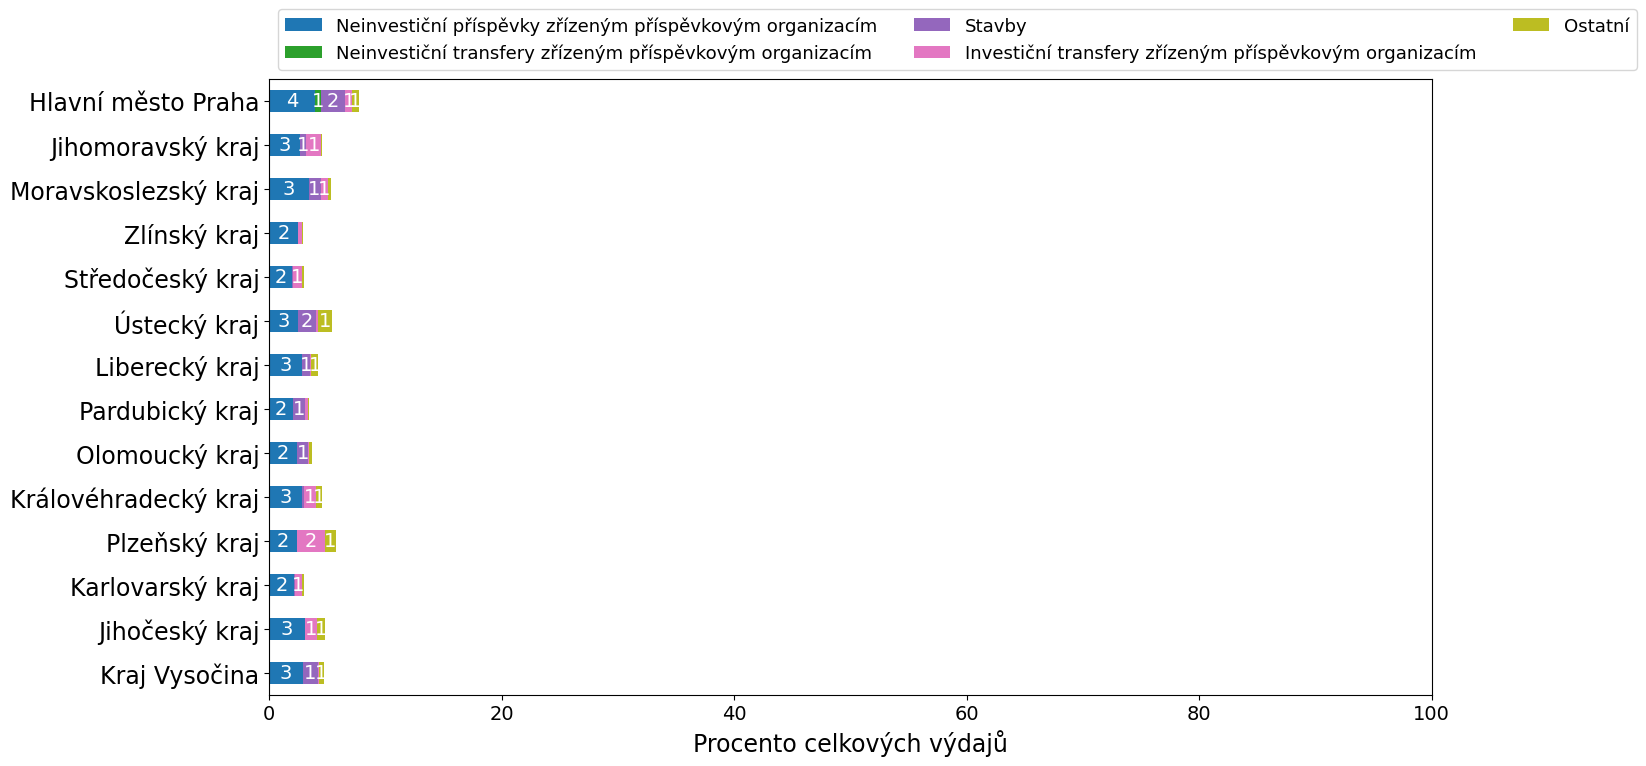

In [47]:
###Skolstvi - closer look
year="2023 BEZVKT"
df_vv=df_vkt.loc[df_vkt.Trida2==501,:].copy()
trida3_cis=pol_cis.copy()
df_vv.loc[:,"Trida3"]=df_vv.loc[:,"Pol"].copy()
trida3_cis[9999]="Ostatní"

#merge small polo
for para in df_vv.Trida3.unique():
    if (df_vv.loc[df_vv.Trida3==para,year].sum())<0.5*(10**9):
        df_vv.loc[df_vv.Trida3==para,"Trida3"]=9999
#make df_graph
df_graph_vv=pd.DataFrame({})
for kraj in kraje:
    df_aux=df_vv.loc[df_vv.Kraj==kraj,[year,"Trida3"]].groupby("Trida3").sum().rename(columns={year:kraj})
    for ind in df_aux.index:
        df_graph_vv.loc[ind,kraj]=df_aux.loc[ind,kraj]
    
### actual graph
data=df_graph_vv/df_graph_vkt.sum(axis=0)*100

fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
size1=17
size2=19

data_cum=data.cumsum(axis=0)
category_colors = matplotlib.colormaps['tab10'](np.linspace(0, 0.8, data.shape[0]))
#category_colors=["tab:blue","lightblue","lightgreen","violet"]
labels = data.columns
y=np.arange(len(labels))

i=0
for kap in data.index:
    widths = data.iloc[i, :]
    starts = data_cum.iloc[i, :] - widths
    if kap=="Ostatní": #set manual color
        color="lightgrey"
        
    else:
        color=category_colors[i]
    rects = ax.barh(y, widths, left=starts,height=0.5,label=trida3_cis[kap],color=color)
    try:
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    except: #this happens if we set manual color
        text_color="black"
    
    a=np.round(np.array(data.iloc[i,:]),0).astype(int).astype(str)
    a[a=="0"]=""
    ax.bar_label(rects, label_type='center', color=text_color,labels=a)    
    i+=1
    
ax.set_ylim(top=len(labels)-0.5,bottom=-0.5)
ax.set_xlim(right=100)
ax.set_yticks(y)
ax.set_yticklabels(labels,size=size1)    
ax.legend(ncol=3, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=13.1)
ax.set_xlabel("Procento celkových výdajů",size=size1)
plt.show()

In [48]:
#### jen výdaje kryté transfery
df_graph_bezvkt=pd.DataFrame({})
for kraj in kraje:
    df_aux=df_vkt.loc[df_vkt.Kraj==kraj,["2023 VKT","Trida2"]].groupby("Trida2").sum().rename(columns={"2023 VKT":kraj})
    for ind in df_aux.index:
        df_graph_bezvkt.loc[ind,kraj]=df_aux.loc[ind,kraj]
    df_graph_bezvkt.loc[99999,kraj]=df_vkt.loc[df_vkt.Kraj==kraj,"2023 BEZVKT"].sum()
trida2_cis[99999]="Výdaje nekryté transfery"
df_graph_bezvkt=df_graph_bezvkt.sort_index()

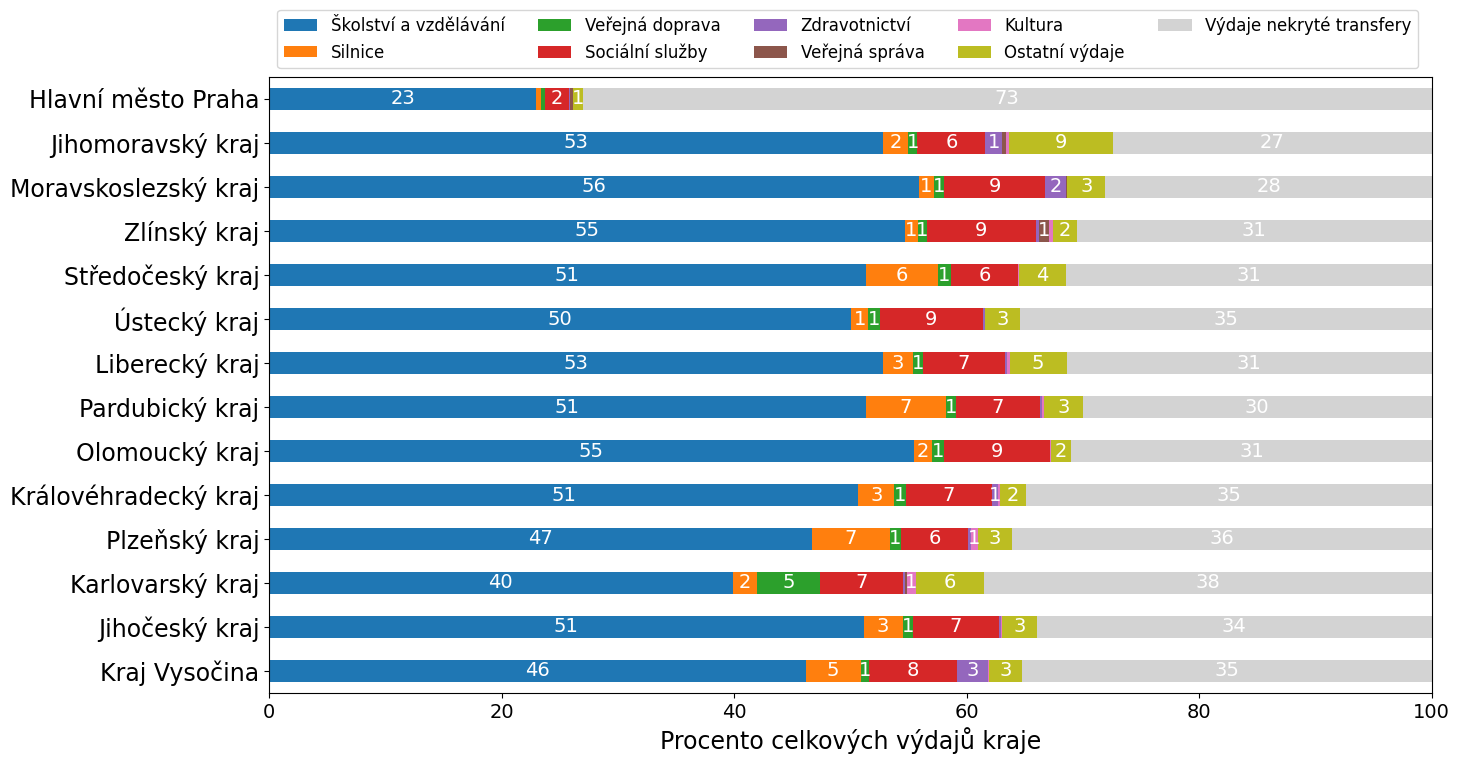

In [49]:
### stacked graf
data=df_graph_bezvkt/df_graph_bezvkt.sum(axis=0)*100

fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
size1=17
size2=19

data_cum=data.cumsum(axis=0)
category_colors = matplotlib.colormaps['tab10'](np.linspace(0, 0.8, data.shape[0]-1))
#category_colors=["tab:blue","lightblue","lightgreen","violet"]
labels = data.columns
y=np.arange(len(labels))

i=0
for kap in data.index:
    widths = data.iloc[i, :]
    starts = data_cum.iloc[i, :] - widths
    if kap==99999: #set manual color
        color="lightgrey"
        
    else:
        color=category_colors[i]
    rects = ax.barh(y, widths, left=starts,height=0.5,label=trida2_cis[kap],color=color)
    try:
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    except: #this happens if we set manual color
        text_color="white"
    a=np.round(np.array(data.iloc[i,:]),0).astype(int).astype(str)
    a[a=="0"]=""
    ax.bar_label(rects, label_type='center', color=text_color,labels=a)   
    i+=1
    
ax.set_ylim(top=len(labels)-0.5,bottom=-0.5)
ax.set_xlim(right=100)
ax.set_yticks(y)
ax.set_yticklabels(labels,size=size1)    
ax.legend(ncol=5, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=12)
ax.set_xlabel("Procento celkových výdajů kraje",size=size1)
# plt.savefig("graphs/graf_A3b.png",bbox_inches='tight')
# data.rename(index=trida2_cis).to_excel(f"graphs/graf_A3b.xlsx")
plt.show() #Vysočina má miliardu a půl v "ostatních" (r. 2022; položka i paragraf). U Prahy je to 5 p.b. svoz odpadů a policie (věci, co dělá město)

### 2.5. Investiční vs běžné výdaje

In [50]:
df_inv=df_vkt.copy()
df_inv.loc[:,"Trida3"]=df_vv.loc[:,"Trida"].copy()

df_graph_inv=pd.DataFrame({})
for kraj in kraje:
    df_aux=df_inv.loc[df_inv.Kraj==kraj,["2023 BEZVKT","Trida"]].groupby("Trida").sum().rename(columns={"2023 BEZVKT":kraj})
    for ind in df_aux.index:
        df_graph_inv.loc[ind,kraj]=df_aux.loc[ind,kraj]
    df_graph_inv.loc["Výdaje kryté transfery",kraj]=df_inv.loc[df_inv.Kraj==kraj,"2023 VKT"].sum()

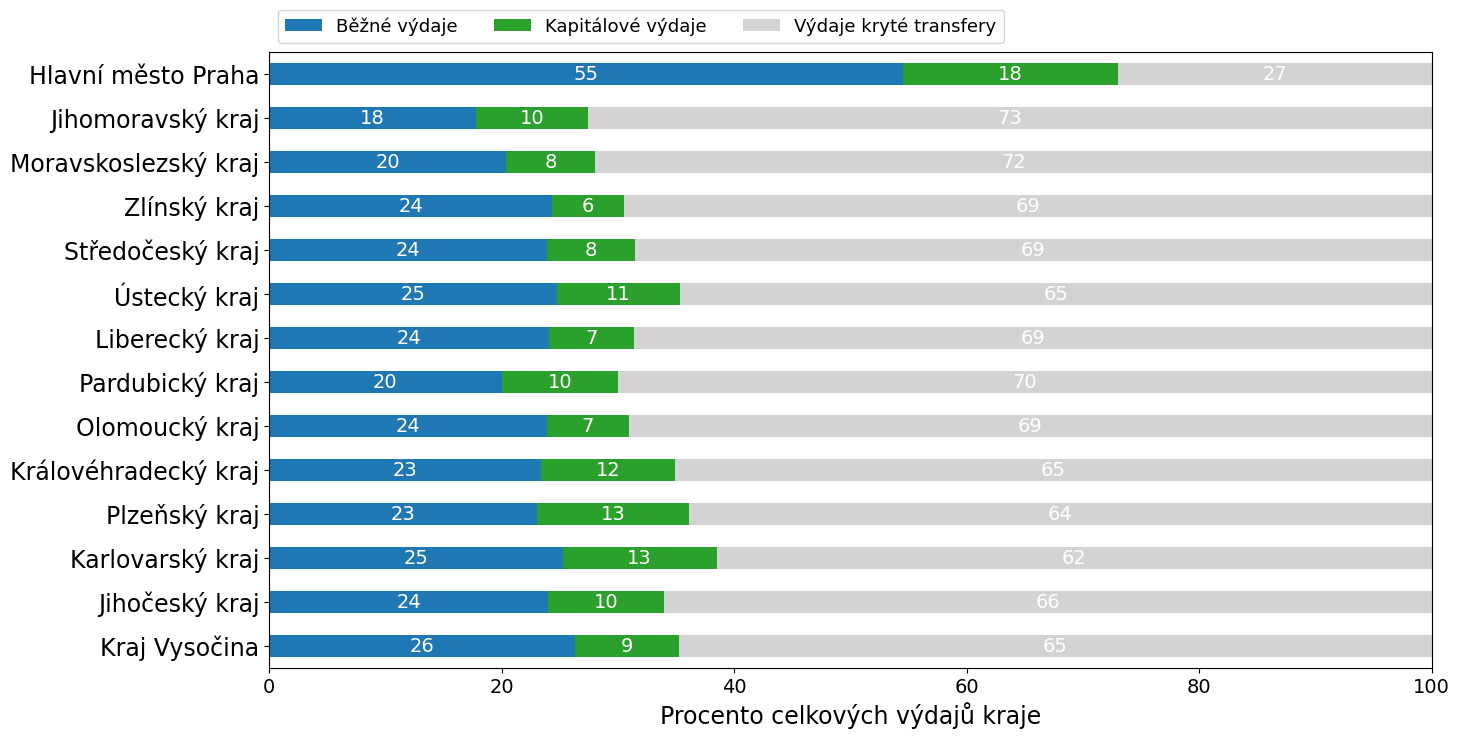

In [51]:
### stacked graf
data=df_graph_inv/df_graph_inv.sum(axis=0)*100

fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
size1=17
size2=19

data_cum=data.cumsum(axis=0)
category_colors = matplotlib.colormaps['tab10'](np.linspace(0, 0.5, data.shape[0]))
#category_colors=["tab:blue","lightblue","lightgreen","violet"]
labels = data.columns
y=np.arange(len(labels))

i=0
for kap in data.index:
    widths = data.iloc[i, :]
    starts = data_cum.iloc[i, :] - widths
    if kap=="Výdaje kryté transfery": #set manual color
        color="lightgrey"
        
    else:
        color=category_colors[i]
    rects = ax.barh(y, widths, left=starts,height=0.5,label=kap,color=color)
    try:
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    except: #this happens if we set manual color
        text_color="white"
    ax.bar_label(rects, label_type='center', color=text_color,labels=np.round(np.array(data.iloc[i,:]),0).astype(int))    
    i+=1
    
ax.set_ylim(top=len(labels)-0.5,bottom=-0.5)
ax.set_xlim(right=100)
ax.set_yticks(y)
ax.set_yticklabels(labels,size=size1)    
ax.legend(ncol=5, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=13.1)
ax.set_xlabel("Procento celkových výdajů kraje",size=size1)
plt.savefig("graphs/graf_3c.png",bbox_inches='tight')
data.to_excel(f"graphs/graf_3c.xlsx")
plt.show() #Vysočina má miliardu a půl v "ostatních" (r. 2022; položka i paragraf). U Prahy je to 5 p.b. svoz odpadů a policie (věci, co dělá město)

## 3. Časové řady

In [52]:
### make df časových řad-nominální
df1=pd.DataFrame({})
for year in years[:-2]:
    df1.loc[:,year]=df_p.loc[:,["Kraj",year]].groupby("Kraj").sum().reindex(kraje)
    
### adjust by inflation (ceny 2014 - nastaveno přímo v Excelu)
inf=pd.read_excel("data/Méně známé dávky - excel.xlsx",index_col=0,sheet_name=0)
df2=pd.DataFrame({})
for year in years[:-2]:
    df2.loc[:,year]=df1.loc[:,year]/inf.loc["Inflace",int(year)]

### base year=100 reálně
base_year="2014"
df3=df2.div(df2.loc[:,base_year],axis=0)*100

### base year=100 nominálně
base_year="2014"
df4=df1.div(df1.loc[:,base_year],axis=0)*100

### share on HDP
df5=pd.DataFrame({})
for kraj in kraje:
    for year in years[:-2]:
        df5.loc[kraj,year]=df1.loc[kraj,year]/hdp.loc[kraj,year]/10**6*100
        
### Kč na obyv
df6=pd.DataFrame({})
for kraj in kraje:
    for year in years[:-2]:
        df6.loc[kraj,year]=df1.loc[kraj,year]//obyv.loc[kraj,year]

KeyError: 'Hlavní město Praha'

In [ ]:
### Nominální vývoj
fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
df1=df1.T
category_colors = matplotlib.colormaps['tab20'](np.linspace(0, 1, df1.shape[1]))
for i in range(len(df1.columns)):
    ax.plot(df1.index.astype("str"),df1.iloc[:,i]/10**9,linestyle="-",marker='o',label=df1.iloc[:,i].name,color=category_colors[i])
#ax.plot(df1.index.astype("str"),np.repeat(100,len(df1.index)),color="black",linestyle="-")
#ax.tick_params(axis="y",labelright=True,right=True)

ax.grid(True,axis="y")
ax.set_xlim(left=0,right=len(df1.index)-1)
ax.set_ylim(bottom=0)
ax.set_xlabel("Rok")
ax.set_ylabel("Mld. Kč")
#ax.legend(bbox_to_anchor = [0.88, -0.15])
ax.legend(ncol=2,fontsize=10,loc='center')
plt.show()

In [ ]:
### Reálný vývoj
fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
df2=df2.T
for i in range(len(df2.columns)):
    ax.plot(df2.index.astype("str"),df2.iloc[:,i]/10**9,linestyle="-",marker='o',label=df2.iloc[:,i].name,color=category_colors[i])
#ax.plot(df2.index.astype("str"),df2.iloc[:,-1],linestyle="-",marker='o',label="Existenční a životní minimum",color='#17becf')
#ax.plot(df2.index.astype("str"),np.repeat(100,len(df2.index)),color="black",linestyle="-")
#ax.tick_params(axis="y",labelright=True,right=True)

ax.grid(True,axis="y")
ax.set_xlim(left=0,right=len(df2.index)-1)
ax.set_ylim(bottom=0)
ax.set_xlabel("Rok")
ax.set_ylabel(f"Mld. Kč (ceny roku {base_year})")
#ax.legend(bbox_to_anchor = [0.88, -0.15])
ax.legend(ncol=2,fontsize=10,loc='center')
plt.show()

In [ ]:
### Nominální vývoj, base year=100
fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
df4=df4.T
for i in range(len(df4.columns)):
    ax.plot(df4.index.astype("str"),df4.iloc[:,i],linestyle="-",marker='o',label=df4.iloc[:,i].name,color=category_colors[i])
#černá line se 100%
ax.plot(df4.index.astype("str"),np.repeat(100,len(df4.index)),marker='',color="black",linewidth=2)
#ax.plot(df4.index.astype("str"),df4.iloc[:,-1],linestyle="-",marker='o',label="Existenční a životní minimum",color='#17becf')
#ax.plot(df4.index.astype("str"),np.repeat(100,len(df4.index)),color="black",linestyle="-")
#ax.tick_params(axis="y",labelright=True,right=True)

ax.yaxis.set_major_formatter(mtick.PercentFormatter()) #y axis is in %
ax.grid(True,axis="y")
ax.set_xlim(left=0,right=len(df4.index)-1)
ax.set_ylim(bottom=0,top=255)
ax.set_xlabel("Rok")
#ax.legend(bbox_to_anchor = [0.88, -0.15])
ax.legend(ncol=2,fontsize=10,loc='lower center')
#plt.savefig("graf_1.2.jpg",dpi=400,bbox_inches="tight")
#df4.to_excel("graf_1.2.xlsx")
plt.show()

In [ ]:
### Reálný vývoj, base year=100
fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
df3=df3.T
for i in range(len(df3.columns)):
    ax.plot(df3.index.astype("str"),df3.iloc[:,i],linestyle="-",marker='o',label=df3.iloc[:,i].name,color=category_colors[i])
#černá line se 100%
ax.plot(df3.index.astype("str"),np.repeat(100,len(df3.index)),marker='',color="black",linewidth=2)
#ax.plot(df3.index.astype("str"),df3.iloc[:,-1],linestyle="-",marker='o',label="Existenční a životní minimum",color='#17becf')
#ax.plot(df3.index.astype("str"),np.repeat(100,len(df3.index)),color="black",linestyle="-")
#ax.tick_params(axis="y",labelright=True,right=True)

ax.yaxis.set_major_formatter(mtick.PercentFormatter()) #y axis is in %
ax.grid(True,axis="y")
ax.set_xlim(left=0,right=len(df3.index)-1)
ax.set_ylim(bottom=0,top=215)
ax.set_xlabel("Rok")
#ax.legend(bbox_to_anchor = [0.88, -0.15])
ax.legend(ncol=2,fontsize=10,loc='lower center')
#plt.savefig("graf_1.2.jpg",dpi=400,bbox_inches="tight")
#df3.to_excel("graf_1.2.xlsx")
plt.show()

In [ ]:
### Podíl na HDP
fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
df5=df5.T
for i in range(len(df5.columns)):
    ax.plot(df5.index.astype("str"),df5.iloc[:,i],linestyle="-",marker='o',label=df5.iloc[:,i].name,color=category_colors[i])

ax.yaxis.set_major_formatter(mtick.PercentFormatter()) #y axis is in %
ax.grid(True,axis="y")
ax.set_xlim(left=0,right=len(df5.index)-1)
ax.set_ylim(bottom=0)
ax.set_xlabel("Rok")
ax.set_ylabel("Podíl na HDP")
#ax.legend(bbox_to_anchor = [0.88, -0.15])
ax.legend(ncol=2,fontsize=10,loc='lower center')
#plt.savefig("graf_1.2.jpg",dpi=400,bbox_inches="tight")
#df5.to_excel("graf_1.2.xlsx")
plt.show()

### 3.1. Časové řady pro všechny kraje dohromady

In [ ]:
df_ts_p=df_p.loc[:,years[:-2]+["Trida2"]].groupby("Trida2").sum().rename(index=trida2_cis)
df_ts_v=df_v.loc[:,years[:-2]+["Trida2"]].groupby("Trida2").sum().rename(index=trida2_cis)

In [ ]:
### mld. Kč - příjmy
fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})

#create data
x=list(df_ts_p.T.index.astype("str")) #přidat sr
y=[]
y_labels=[]
for col in df_ts_p.T.columns:
    y_aux=df_ts_p.T.loc[:,col]
    y.append(y_aux/10**9)
    y_labels.append(col)


ax.stackplot(x,[list(yi) for yi in y],linestyle="-",labels=y_labels)
#ax.plot(data.index.astype("str"),(data.sum(axis=1))/(10**9),linestyle="-",marker='',color="black",label="Celkem")
ax.tick_params(labelright=True,right=True)
ax.grid(False,axis="y")
ax.set_xlim(left=0,right=len(df_ts_p.T.index.astype("str"))-1)
#ax.set_ylim(top=85)
ax.legend()
ax.set_xlabel("Rok")
ax.set_ylabel("Mld. Kč")
plt.show()

In [ ]:
### share on total - příjmy
df_sh_p=df_ts_p.div(df_ts_p.sum(axis=0))*100
fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})

#create data
x=list(df_sh_p.T.index.astype("str")) #přidat sr
y=[]
y_labels=[]
for col in df_sh_p.T.columns:
    y_aux=df_sh_p.T.loc[:,col]
    y.append(y_aux)
    y_labels.append(col)


ax.stackplot(x,[list(yi) for yi in y],linestyle="-",labels=y_labels)
#ax.plot(data.index.astype("str"),(data.sum(axis=1))/(10**9),linestyle="-",marker='',color="black",label="Celkem")
ax.tick_params(labelright=True,right=True)
ax.grid(False,axis="y")
ax.set_xlim(left=0,right=len(df_sh_p.T.index.astype("str"))-1)
ax.set_ylim(top=100,bottom=0)
ax.legend()
ax.set_xlabel("Rok")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [ ]:
### mld. Kč - výdaje
fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})

#create data
x=list(df_ts_v.T.index.astype("str")) #přidat sr
y=[]
y_labels=[]
for col in df_ts_v.T.columns:
    y_aux=df_ts_v.T.loc[:,col]
    y.append(y_aux/10**9)
    y_labels.append(col)


ax.stackplot(x,[list(yi) for yi in y],linestyle="-",labels=y_labels)
#ax.plot(data.index.astype("str"),(data.sum(axis=1))/(10**9),linestyle="-",marker='',color="black",label="Celkem")
ax.tick_params(labelright=True,right=True)
ax.grid(False,axis="y")
ax.set_xlim(left=0,right=len(df_ts_v.T.index.astype("str"))-1)
#ax.set_ylim(top=85)
ax.legend()
ax.set_xlabel("Rok")
ax.set_ylabel("Mld. Kč")
plt.show()

In [ ]:
### share on total - výdaje
df_sh_v=df_ts_v.div(df_ts_v.sum(axis=0))*100
fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})

#create data
x=list(df_sh_v.T.index.astype("str")) #přidat sr
y=[]
y_labels=[]
for col in df_sh_v.T.columns:
    y_aux=df_sh_v.T.loc[:,col]
    y.append(y_aux)
    y_labels.append(col)


ax.stackplot(x,[list(yi) for yi in y],linestyle="-",labels=y_labels)
#ax.plot(data.index.astype("str"),(data.sum(axis=1))/(10**9),linestyle="-",marker='',color="black",label="Celkem")
ax.tick_params(labelright=True,right=True)
ax.grid(False,axis="y")
ax.set_xlim(left=0,right=len(df_sh_v.T.index.astype("str"))-1)
ax.set_ylim(top=100,bottom=0)
ax.legend()
ax.set_xlabel("Rok")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()